In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import matplotlib
import importlib
from datapaths import *

%matplotlib inline

In [10]:
import affective_utils as au

In [13]:
importlib.reload(au)

<module 'affective_utils' from '/data/emotion-estimator/affective_utils.py'>

In [7]:
!pygmentize datapaths.py

import os

datacontinous = "/data/ssd/2018laptop"

devdatacontinous =  datacontinous + "/ContinuousLIRIS-ACCEDE/continuous-movies/"
med2017datafolderTest = datacontinous + '/mediaeval2017/MEDIAEVAL17-TestSet-Data/MEDIAEVAL17-TestSet-Data/data/'

pathcontfeatures = datacontinous + "/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"
med2017testfeatures = datacontinous + "/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"

med2016annotationsFolder = datacontinous + "/ContinuousLIRIS-ACCEDE/LIRIS-ACCEDE-continuous-annotations/continuous-annotations/"
med2017annotationsFolder = datacontinous + '/mediaeval2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = datacontinous + '/mediaeval2017/MEDIAEVAL17-DevSet-Fear-annotations/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'

facesfolder = datacontinous + '/cvpr2014/repro/mediaeval/data/dataset/dlibfaces/'
framesfolder = datacontinous + 

In [7]:
#featdir = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/shortvideofeatures/"
#labeldir = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/shortvideolabels/"

#featdir = "/media/yt/Seagate Expansion Drive/2018laptop/cvpr2014/repro/mediaeval/data/dataset/Continuous/shortvideofeatures/"
#labeldir = "/media/yt/Seagate Expansion Drive/2018laptop/cvpr2014/repro/mediaeval/data/dataset/Continuous/shortvideolabels/"

# datadir = "/home/yt/Downloads/pnas_py3/CowenKeltnerEmotionalVideos/mp4_noname/"
# featdir = "./shortvideofeatures/"
# labeldir = "./shortvideolabels/"

# landmarkfold = '/home/yt/Downloads/pnas_py3/landmarks/'



In [14]:
!ls {pnas_py3_dir}/colors

After_The_Rain-color-info.txt	     Payload-color-info.txt
Barely_legal_stories-color-info.txt  Sintel-color-info.txt
Chatter-color-info.txt		     Tears_of_Steel-color-info.txt
Cloudland-color-info.txt	     The_secret_number-color-info.txt
Damaged_Kung_Fu-color-info.txt


In [15]:
movieNames = au.getDevMovieNames()
movieNames

['After_The_Rain',
 'Attitude_Matters',
 'Barely_legal_stories',
 'Between_Viewings',
 'Big_Buck_Bunny',
 'Chatter',
 'Cloudland',
 'Damaged_Kung_Fu',
 'Decay',
 'Elephant_s_Dream',
 'First_Bite',
 'Full_Service',
 'Islands',
 'Lesson_Learned',
 'Norm',
 'Nuclear_Family',
 'On_time',
 'Origami',
 'Parafundit',
 'Payload',
 'Riding_The_Rails',
 'Sintel',
 'Spaceman',
 'Superhero',
 'Tears_of_Steel',
 'The_room_of_franz_kafka',
 'The_secret_number',
 'To_Claire_From_Sonny',
 'Wanted',
 'You_Again']

In [16]:
#au.displayframe('Chatter',490)

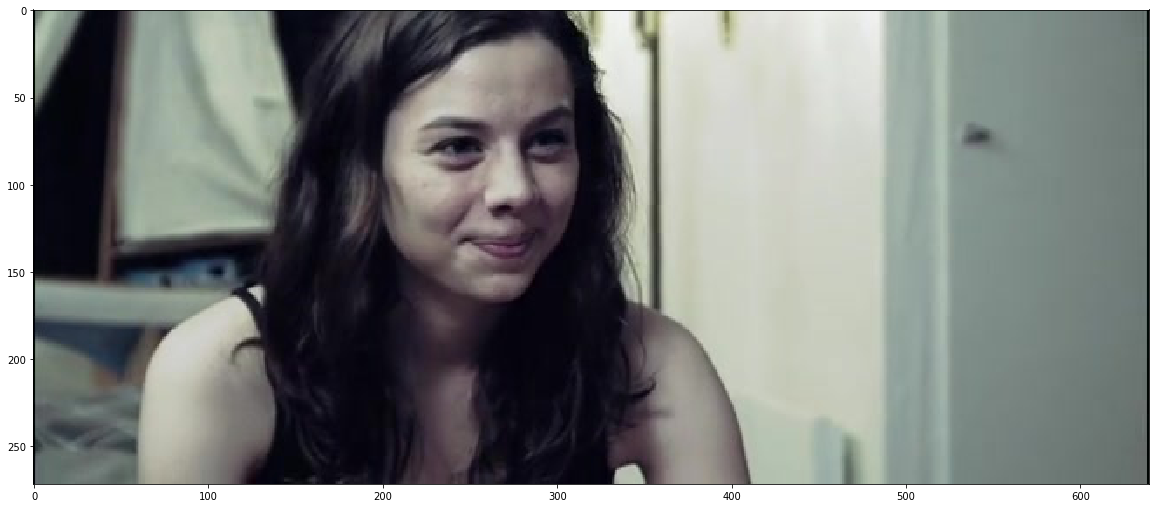

In [17]:
au.displayframe('Chatter',282)

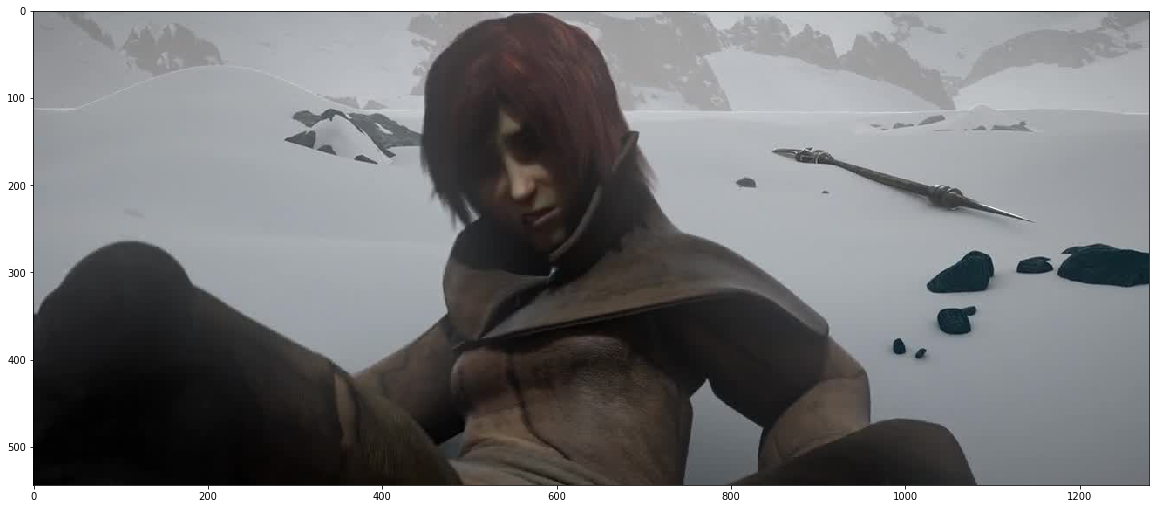

In [12]:
au.displayframe('Sintel',62)
#df = getAnnotationDf(movieNames[0],med2017annotationsFolder)
#df[['MeanValence','MeanArousal']].plot(ax=plt.gca())
#au.avfear()
#bau.displayAVscores(movieNames)

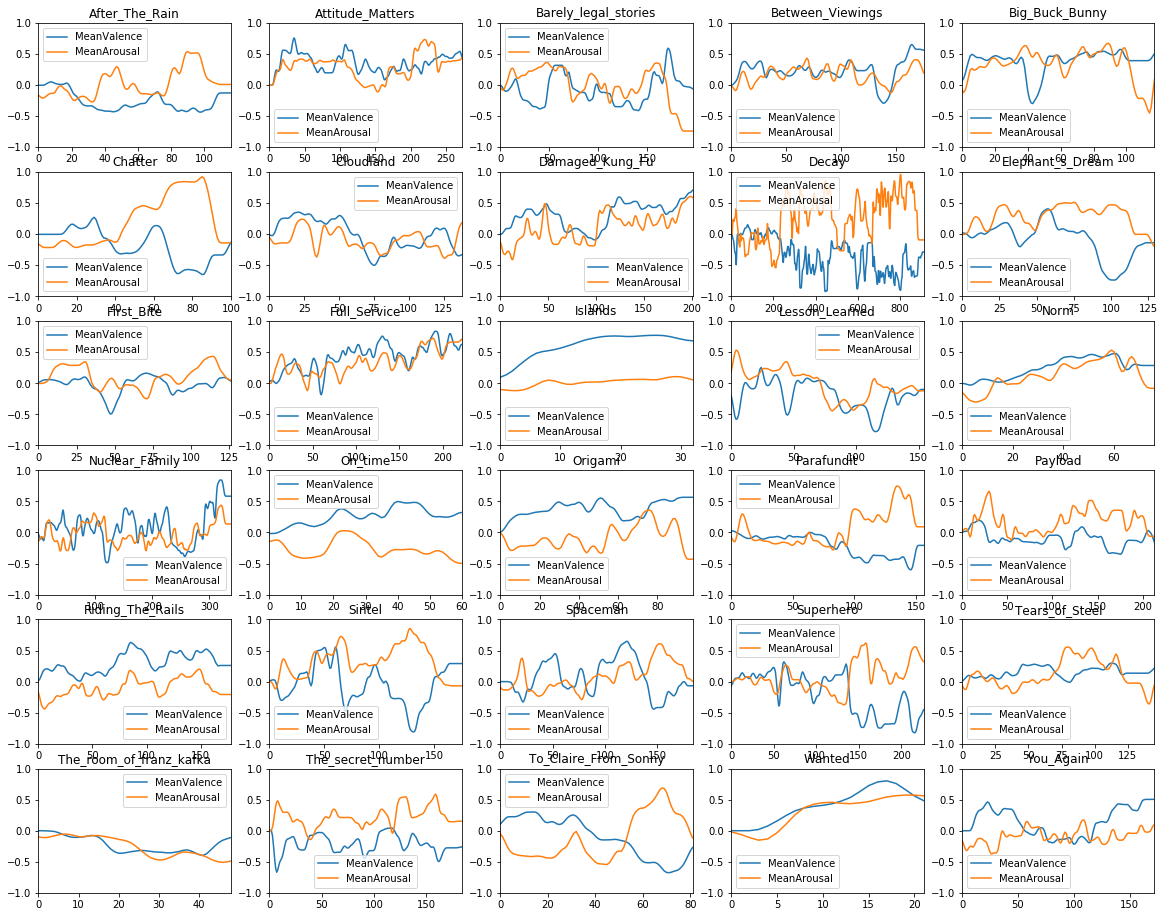

In [18]:
au.displayAVscores(movieNames)

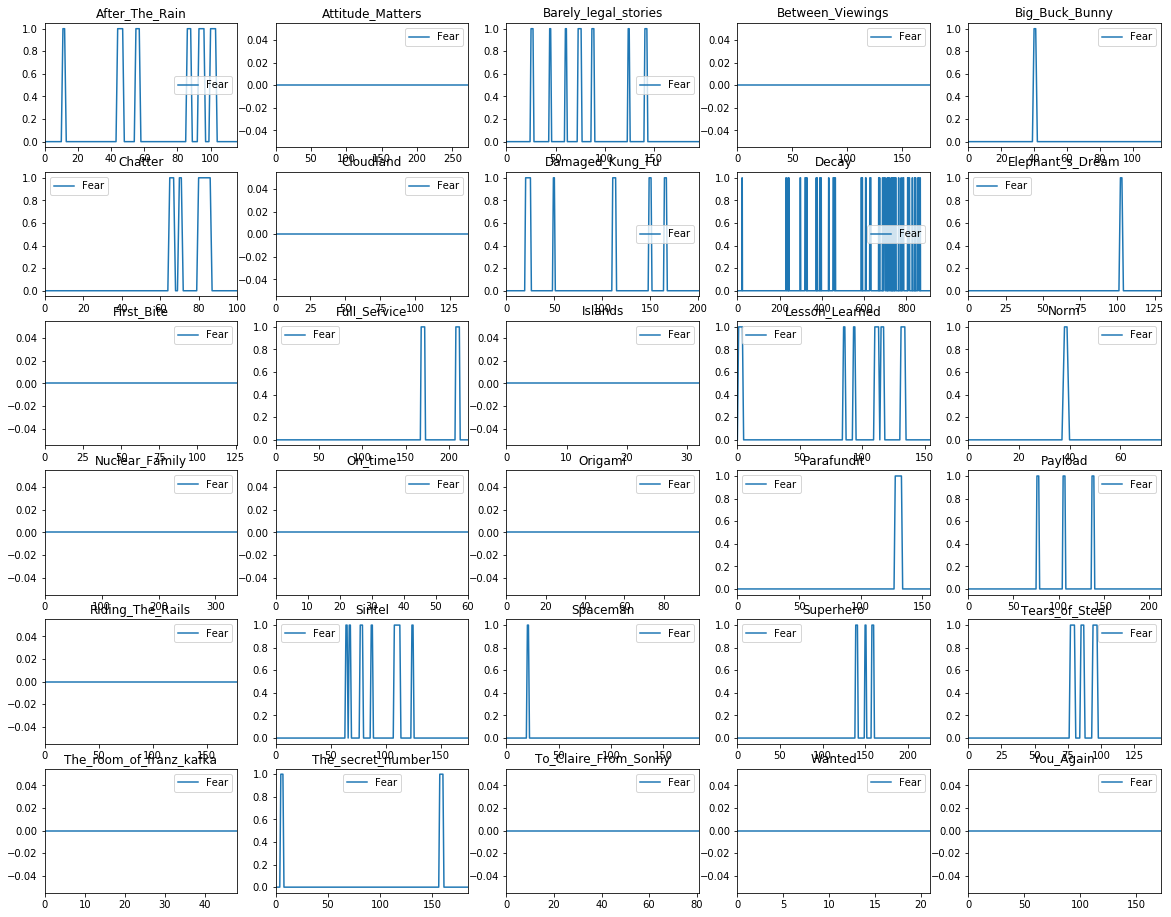

In [14]:
au.displayFear(movieNames)

/home/yt/workplace/emotion-estimator/affective_utils.py:277: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  farr = feardf[feardf['Fear'] > 0]['Id'].as_matrix()


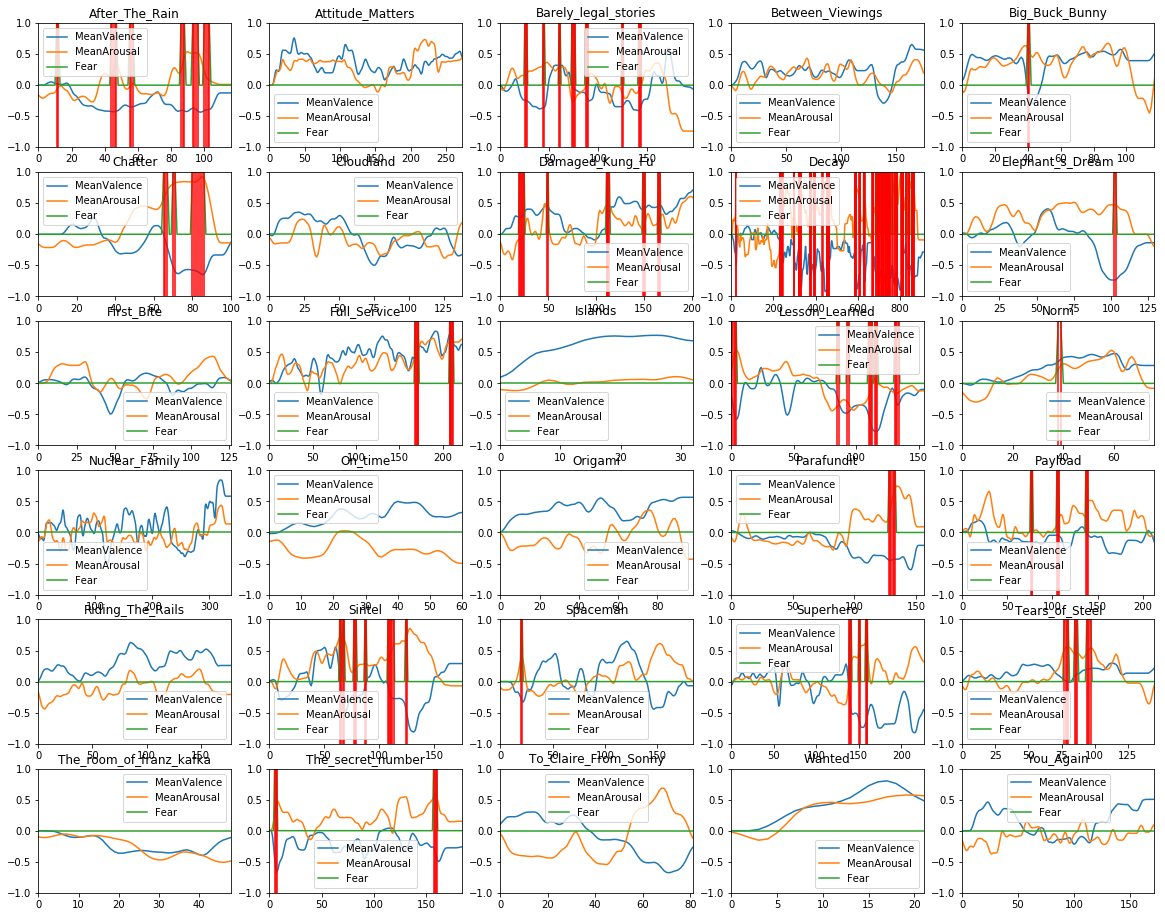

In [15]:
au.displayAVFear(movieNames)

In [19]:
!head -n 10 {pnas_py3_dir}/colors/Chatter-color-info.txt

	0	1	2	3	4
0	#6a9662	#ad6040	#d0e7b0	#090605	#643826
1	#0a0705	#af6241	#6a9661	#693927	#d0e8b0
2	#202529	#9e7b4f	#c8f3e6	#72472f	#010302
3	#cacbd8	#010200	#322824	#313f82	#82786f
4	#2f2923	#887f71	#c1cccc	#010301	#404961
5	#807d7a	#010201	#c2ccd2	#272520	#4b4a4c
6	#99a0a0	#575855	#181918	#010201	#343433
7	#181817	#353434	#989c99	#585754	#000100
8	#888888	#a11413	#555555	#000100	#231f1e


In [17]:
!head -n 3 {pnas_py3_dir}/landmarks/Cloudland-faces-info.txt

id height width numface locations nummark landmark
0 360 640 0 [] 0 []
1 360 640 0 [] 0 []


In [20]:
def getlandmarksDf(movie):
    df = pd.read_csv(landmarkfold+movie+'-faces-info.txt',  sep='\t', index_col=0 )
    #df = pd.read_csv(landmarkfold+movie+'-faces-info.txt',  sep=' ', index_col=0 )
    df = df.infer_objects()
    #df.info()
    return df
    

In [19]:
#au.plotmovieAV('Cloudland')


icmr makalesi üzerinde çalışıyorum. 4.2'de "a closer shot of the
character signifies stronger affect in the scene" diye bir şey var.
bunu deneysel olarak gördük mü? şöyle bir figür hazırlayabilir misin:
x axis: yüz karesinin boyutu (label: Face size)
y axis: o video karesi için mutlak değeri en yüksek boyutun mutlak
değeri (label: Highest affect annotation)

sonra bu noktalara bir lineer regresyon oturttuğumuzda gerçekten artan
bir grafik görüyor muyuz? yoksa bulut gibi mi...

(bunun bir de y axis'te mutlak değeri en yüksek boyutun değeri
versiyonunu yapabiliriz, o zaman bir kısmı pozitif, bir kısmı negatif
y ekseninde çıkar, o da ilginç olacaktır.)


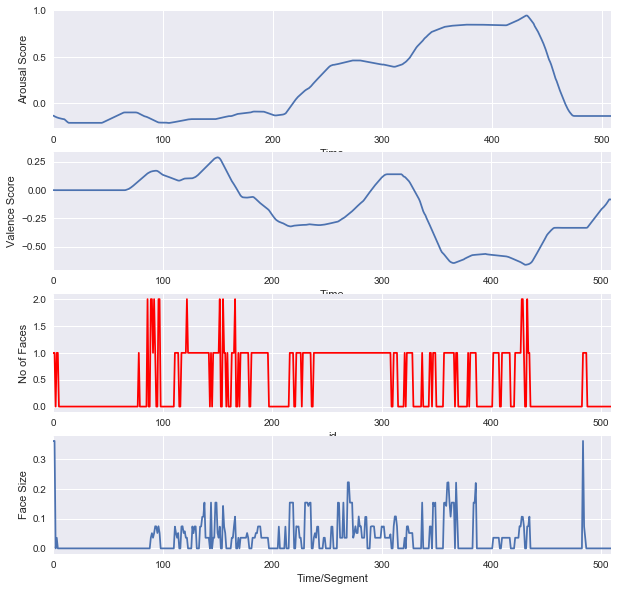

In [21]:
#avdf=au.getAnnotationDf('Chatter')
plt.style.use('seaborn')#switch to seaborn style

fig, axs = plt.subplots(4,1,figsize=(10,10))
plt.subplot(4,1,1)
adf=au.getFullArousalDf('Chatter')
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('Arousal Score')
adf.MeanArousal.plot(ax=plt.gca())

plt.subplot(4,1,2)
vdf=au.getFullValenceDf('Chatter')
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('Valence Score')
vdf.MeanValence.plot(ax=plt.gca())

plt.subplot(4,1,3)
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('No of Faces')
#df=au.getfacedf('Chatter')
#df.noface.plot(ax=plt.gca())
df=getlandmarksDf('Chatter')
df.numface.plot(ax=plt.gca(),style='r')

plt.subplot(4,1,4)
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('Face Size')
fdf=au.getfacedf('Chatter')
fdf.farea.plot(ax=plt.gca())


In [21]:
#mlen = min(len(fdf.farea),len(adf.MeanArousal))
#plt.plot(adf.MeanArousal[:mlen],fdf.farea[:mlen])

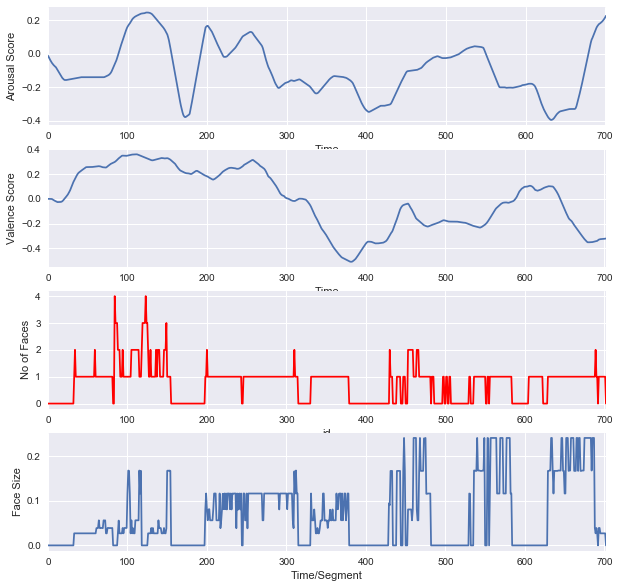

In [22]:
fig, axs = plt.subplots(4,1,figsize=(10,10))
plt.subplot(4,1,1)
adf=au.getFullArousalDf('Cloudland')
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('Arousal Score')
adf.MeanArousal.plot(ax=plt.gca())

plt.subplot(4,1,2)
vdf=au.getFullValenceDf('Cloudland')
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('Valence Score')
vdf.MeanValence.plot(ax=plt.gca())

plt.subplot(4,1,3)
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('No of Faces')
df = pd.read_csv(landmarkfold+'Cloudland'+'-faces-info.txt',  sep=' ', index_col=0 )
df = df.infer_objects()
df.numface.plot(ax=plt.gca(),style='r')

plt.subplot(4,1,4)
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('Time/Segment')
plt.ylabel('Face Size')
fdf=au.getfacedf('Cloudland')
fdf.farea.plot(ax=plt.gca())


In [23]:
print(plt.style.available)
#plt.style.use('classic')#switches back to matplotlib style
#plt.style.use('seaborn')#switch to seaborn style
plt.style.use('fivethirtyeight')


['fast', 'seaborn-colorblind', 'seaborn-dark', 'classic', 'seaborn-white', 'fivethirtyeight', 'seaborn-notebook', 'ggplot', 'seaborn-whitegrid', 'bmh', 'grayscale', 'seaborn-darkgrid', 'seaborn-pastel', 'seaborn-dark-palette', '_classic_test', 'seaborn-ticks', 'tableau-colorblind10', 'seaborn-poster', 'seaborn-muted', 'seaborn-deep', 'seaborn-paper', 'seaborn', 'seaborn-talk', 'Solarize_Light2', 'dark_background', 'seaborn-bright']


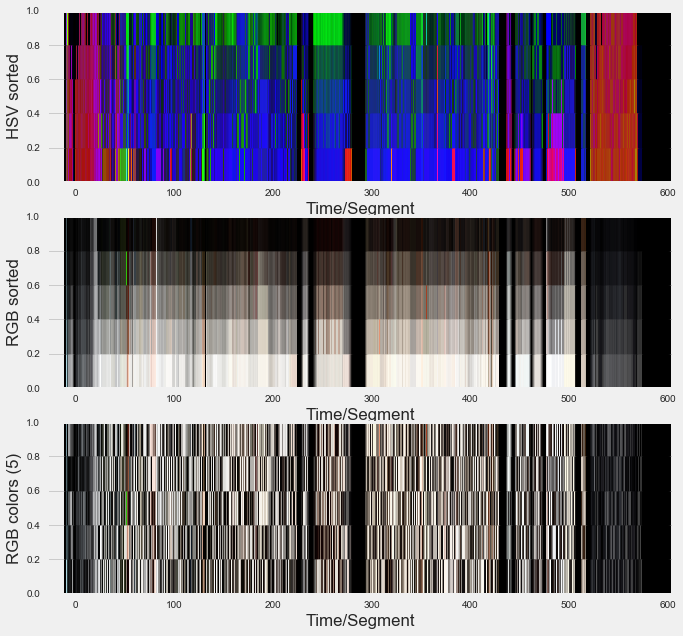

In [24]:
au.displaymoviecolor('After_The_Rain')

In [25]:
movie = 'The_secret_number'

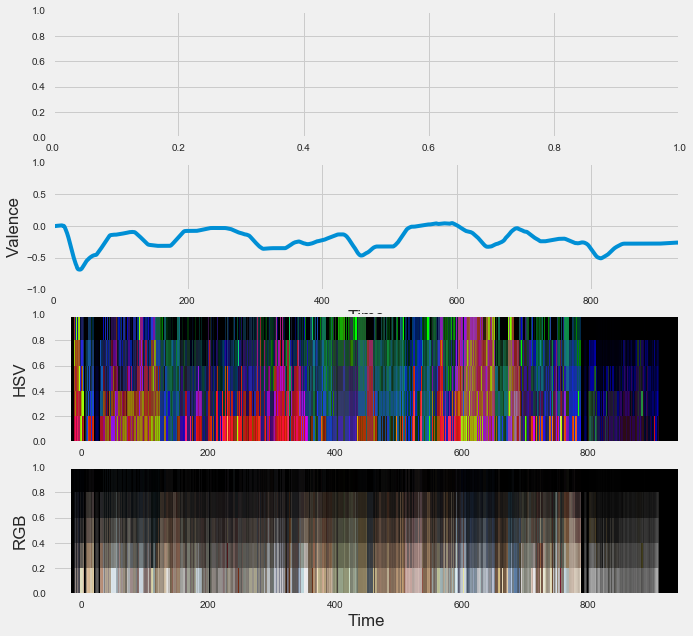

In [26]:
from matplotlib import colors as mcolors

plt.style.use('fivethirtyeight')#switches back to matplotlib style

df = au.getColorCenters(movie)
framescolor= df.values

xi=0
ymax=1
xstep = 1
ystep= 0.20 #1.0/ k
linewidth=20

f , axs = plt.subplots(4,1,figsize=(10,10))

adf=au.getFullArousalDf(movie)
plt.rc('legend',fontsize='medium') # using a named size    
#plt.xlabel('Time/Segment')
plt.ylabel('Arousal')
adf.MeanArousal.plot(ax=plt.gca())

plt.subplot(4,1,2)
plt.axis([-1, 800, -1, 1])
vdf=au.getFullValenceDf(movie)
plt.rc('legend',fontsize='medium') # using a named size    
plt.xlabel('')
plt.ylabel('Valence')
vdf.MeanValence.plot(ax=plt.gca())


plt.subplot(4,1,3)
plt.xlabel('')
plt.ylabel('HSV')

for frame in framescolor:
    ymax=1
    sfrm = sorted([tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])) for color in frame])
    for c in sfrm:
        plt.axvline(x=xi, ymax=ymax, ymin=ymax-ystep,linewidth=20, color=c)
        ymax -= ystep
    xi=xi+xstep

plt.subplot(4,1,4)
xi=0
plt.xlabel('Time')
plt.ylabel('RGB')
for frame in framescolor:
    ymax=1
    frm = sorted([tuple(mcolors.to_rgba(color)[:3]) for color in frame])
    for c in frm:
        plt.axvline(x=xi, ymax=ymax, ymin=ymax-ystep,linewidth=20, color=c)
        ymax -= ystep
    xi=xi+xstep


In [27]:
adf.describe().transpose()

count      mean       std       min       25%       50%  \
MeanArousal  932.0  0.220171  0.155451 -0.149193  0.138905  0.209349   
StdArousal   932.0  0.263811  0.095671  0.001319  0.187576  0.264359   

                  75%       max  
MeanArousal  0.298577  0.598839  
StdArousal   0.334964  0.450825

In [28]:
'''
f , a = plt.subplots(3,1,figsize=(10,10))
avdf=au.getAnnotationDf('Cloudland')
plt.subplot(3,1,1)
avdf[['MeanValence','MeanArousal']].plot(ax=plt.gca())
plt.subplot(3,1,2)
df.numface.plot(ax=plt.gca(),style='r.')
plt.subplot(3,1,3)
fdf=au.getfacedf('Cloudland')
fdf.farea.plot(ax=plt.gca())
'''

"\nf , a = plt.subplots(3,1,figsize=(10,10))\navdf=au.getAnnotationDf('Cloudland')\nplt.subplot(3,1,1)\navdf[['MeanValence','MeanArousal']].plot(ax=plt.gca())\nplt.subplot(3,1,2)\ndf.numface.plot(ax=plt.gca(),style='r.')\nplt.subplot(3,1,3)\nfdf=au.getfacedf('Cloudland')\nfdf.farea.plot(ax=plt.gca())\n"

In [29]:
lowdf = au.getLowFeatureDf('Cloudland')
lowdf.describe()

time   framemean     huemean     satmean     valmean  \
count    702.000000  702.000000  702.000000  702.000000  702.000000   
mean    8763.500000   49.068376   27.034959  170.330886   62.090947   
std     5069.855767   22.583708   10.689424   44.271890   24.137325   
min        1.000000    0.000000    0.000000    0.000000    0.000000   
25%     4382.250000   30.000000   18.435450  137.082500   42.195225   
50%     8763.500000   47.000000   24.581950  181.330500   60.968400   
75%    13144.750000   66.000000   33.647550  205.826500   80.852025   
max    17526.000000  118.000000   62.004300  229.087000  135.784000   

          redmean   greenmean    bluemean     lummean      motion  
count  702.000000  702.000000  702.000000  702.000000  702.000000  
mean    30.025583   48.007432   60.244111   35.678063   11.556001  
std     18.686888   23.951058   22.997100   21.475170   23.522454  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%     12.892425   28.313250   41.878925   19.000000    1.734325  
50%     26.378700   44.053200   60.257400   33.000000    5.266840  
75%     43.696075   66.364650   78.821125   48.000000   13.252475  
max     89.216100  118.170000  134.073000  127.000000  255.000000

In [28]:
def getLowLevelDesc(movie):
    lowdf = au.getLowFeatureDf(movie)
    lowdf.drop('time', axis=1, inplace=True)
    X=[]
    length=len(lowdf)
    for start in range(0,length-5,5):
        if start+10 <=length:
            end = start+10
        else:
            end=length
        #print([start,end])
        f = lowdf.loc[start:end].describe()
        #print(f.head(2))
        n,m = f.shape
        row= f.values.reshape(n*m).tolist()
        X.append(row)
        
    return np.array(X)

In [31]:
#x = au.getLowFeatureDf('Cloudland')
#x.drop('time', axis=1, inplace=True)
#x

In [32]:
features = getLowLevelDesc('Sintel')

In [33]:
len(features),features.shape

(177, (177, 72))

In [37]:
#3 read the labels
labelfile = './CowenKeltnerEmotionalVideos.csv'
labeldf = pd.read_csv(labelfile)

In [38]:
labeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Columns: 649 entries, Filename to zeal
dtypes: float64(595), int64(53), object(1)
memory usage: 10.8+ MB


In [39]:
labeldf.head()

Filename  Admiration  Adoration  Aesthetic Appreciation  Amusement  \
0  0001.mp4    0.000000        0.0                0.083333    0.00000   
1  0002.mp4    0.000000        0.0                0.000000    0.25000   
2  0003.mp4    0.083333        0.0                0.083333    0.66667   
3  0004.mp4    0.000000        0.0                0.000000    0.75000   
4  0005.mp4    0.000000        0.0                0.000000    0.00000   

      Anger   Anxiety       Awe  Awkwardness   Boredom  ...  vitality  \
0  0.083333  0.083333  0.083333     0.000000  0.000000  ...       0.0   
1  0.000000  0.000000  0.000000     0.000000  0.083333  ...       0.0   
2  0.000000  0.000000  0.000000     0.083333  0.000000  ...       0.0   
3  0.000000  0.000000  0.000000     0.083333  0.000000  ...       0.0   
4  0.000000  0.333330  0.000000     0.000000  0.000000  ...       0.0   

   vulnerability  warmth  weakness  weariness  wonder    worry  wrath  \
0            0.0     0.0       0.0    0.00000     0.0  0.00000    0.0   
1            0.0     0.0       0.0    0.00000     0.0  0.00000    0.0   
2            0.0     0.0       0.0    0.00000     0.0  0.00000    0.0   
3            0.0     0.0       0.0    0.11111     0.0  0.00000    0.0   
4            0.0     0.0       0.0    0.00000     0.0  0.11111    0.0   

   yearning  zeal  
0       0.0   0.0  
1       0.0   0.0  
2       0.0   0.0  
3       0.0   0.0  
4       0.0   0.0  

[5 rows x 649 columns]

In [40]:
labeldf = labeldf.set_index('Filename')

In [41]:
emocols= labeldf.columns[list(range(0,34))]
affectdimcols= labeldf.columns[list(range(34,48))]
freewordcols=labeldf.columns[list(range(48,648))]

In [42]:
labeldf.head(5)

Admiration  Adoration  Aesthetic Appreciation  Amusement     Anger  \
Filename                                                                       
0001.mp4    0.000000        0.0                0.083333    0.00000  0.083333   
0002.mp4    0.000000        0.0                0.000000    0.25000  0.000000   
0003.mp4    0.083333        0.0                0.083333    0.66667  0.000000   
0004.mp4    0.000000        0.0                0.000000    0.75000  0.000000   
0005.mp4    0.000000        0.0                0.000000    0.00000  0.000000   

           Anxiety       Awe  Awkwardness   Boredom  Calmness  ...  vitality  \
Filename                                                       ...             
0001.mp4  0.083333  0.083333     0.000000  0.000000       0.0  ...       0.0   
0002.mp4  0.000000  0.000000     0.000000  0.083333       0.0  ...       0.0   
0003.mp4  0.000000  0.000000     0.083333  0.000000       0.0  ...       0.0   
0004.mp4  0.000000  0.000000     0.083333  0.000000       0.0  ...       0.0   
0005.mp4  0.333330  0.000000     0.000000  0.000000       0.0  ...       0.0   

          vulnerability  warmth  weakness  weariness  wonder    worry  wrath  \
Filename                                                                       
0001.mp4            0.0     0.0       0.0    0.00000     0.0  0.00000    0.0   
0002.mp4            0.0     0.0       0.0    0.00000     0.0  0.00000    0.0   
0003.mp4            0.0     0.0       0.0    0.00000     0.0  0.00000    0.0   
0004.mp4            0.0     0.0       0.0    0.11111     0.0  0.00000    0.0   
0005.mp4            0.0     0.0       0.0    0.00000     0.0  0.11111    0.0   

          yearning  zeal  
Filename                  
0001.mp4       0.0   0.0  
0002.mp4       0.0   0.0  
0003.mp4       0.0   0.0  
0004.mp4       0.0   0.0  
0005.mp4       0.0   0.0  

[5 rows x 648 columns]

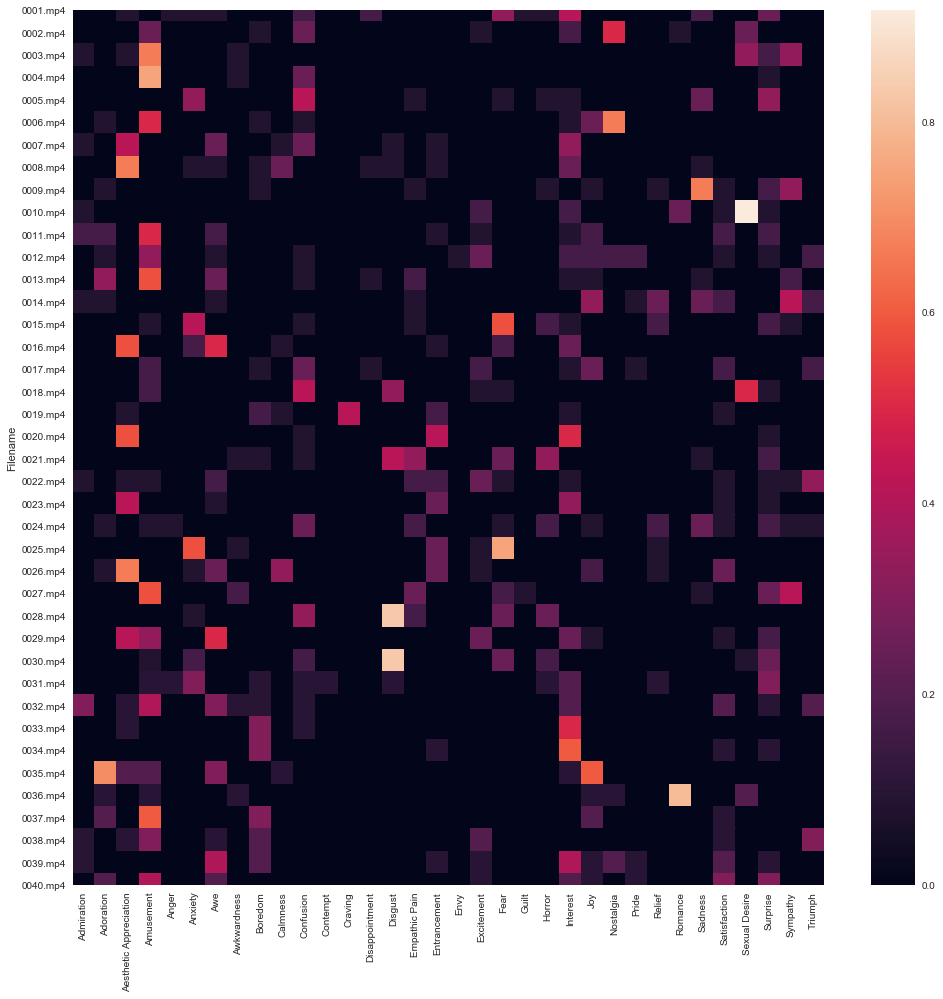

In [43]:
plt.style.use('seaborn')#switches back to matplotlib style

plt.figure(figsize=(15,15))
sns.heatmap(labeldf.iloc[:40][labeldf.columns[:34]])

In [44]:
print(labeldf.columns)

Index(['Admiration', 'Adoration', 'Aesthetic Appreciation', 'Amusement',
       'Anger', 'Anxiety', 'Awe', 'Awkwardness', 'Boredom', 'Calmness',
       ...
       'vitality', 'vulnerability', 'warmth', 'weakness', 'weariness',
       'wonder', 'worry', 'wrath', 'yearning', 'zeal'],
      dtype='object', length=648)


In [45]:
labeldf[labeldf.columns[:34]].describe().transpose()

count      mean       std  min  25%       50%  \
Admiration              2185.0  0.036244  0.070903  0.0  0.0  0.000000   
Adoration               2185.0  0.058781  0.122013  0.0  0.0  0.000000   
Aesthetic Appreciation  2185.0  0.078546  0.153387  0.0  0.0  0.000000   
Amusement               2185.0  0.203651  0.232747  0.0  0.0  0.090909   
Anger                   2185.0  0.016630  0.059287  0.0  0.0  0.000000   
Anxiety                 2185.0  0.066284  0.125448  0.0  0.0  0.000000   
Awe                     2185.0  0.107714  0.140949  0.0  0.0  0.071429   
Awkwardness             2185.0  0.027399  0.069507  0.0  0.0  0.000000   
Boredom                 2185.0  0.044460  0.081898  0.0  0.0  0.000000   
Calmness                2185.0  0.037084  0.087510  0.0  0.0  0.000000   
Confusion               2185.0  0.061994  0.104757  0.0  0.0  0.000000   
Contempt                2185.0  0.010585  0.032475  0.0  0.0  0.000000   
Craving                 2185.0  0.022241  0.114173  0.0  0.0  0.000000   
Disappointment          2185.0  0.013809  0.041815  0.0  0.0  0.000000   
Disgust                 2185.0  0.087725  0.198922  0.0  0.0  0.000000   
Empathic Pain           2185.0  0.026555  0.078694  0.0  0.0  0.000000   
Entrancement            2185.0  0.043742  0.089268  0.0  0.0  0.000000   
Envy                    2185.0  0.007491  0.027297  0.0  0.0  0.000000   
Excitement              2185.0  0.048274  0.081877  0.0  0.0  0.000000   
Fear                    2185.0  0.078686  0.154293  0.0  0.0  0.000000   
Guilt                   2185.0  0.004551  0.020354  0.0  0.0  0.000000   
Horror                  2185.0  0.064243  0.139518  0.0  0.0  0.000000   
Interest                2185.0  0.113169  0.130269  0.0  0.0  0.083333   
Joy                     2185.0  0.081253  0.128760  0.0  0.0  0.000000   
Nostalgia               2185.0  0.032709  0.110895  0.0  0.0  0.000000   
Pride                   2185.0  0.007141  0.031905  0.0  0.0  0.000000   
Relief                  2185.0  0.018475  0.064269  0.0  0.0  0.000000   
Romance                 2185.0  0.030829  0.127056  0.0  0.0  0.000000   
Sadness                 2185.0  0.047250  0.124183  0.0  0.0  0.000000   
Satisfaction            2185.0  0.041255  0.067183  0.0  0.0  0.000000   
Sexual Desire           2185.0  0.052181  0.178935  0.0  0.0  0.000000   
Surprise                2185.0  0.090890  0.118711  0.0  0.0  0.071429   
Sympathy                2185.0  0.032957  0.076092  0.0  0.0  0.000000   
Triumph                 2185.0  0.019498  0.060907  0.0  0.0  0.000000   

                             75%      max  
Admiration              0.076923  0.50000  
Adoration               0.076923  0.83333  
Aesthetic Appreciation  0.083333  0.81818  
Amusement               0.363640  1.00000  
Anger                   0.000000  0.54545  
Anxiety                 0.083333  0.91667  
Awe                     0.166670  0.70000  
Awkwardness             0.000000  0.75000  
Boredom                 0.076923  0.66667  
Calmness                0.058824  0.69231  
Confusion               0.083333  0.90000  
Contempt                0.000000  0.34615  
Craving                 0.000000  1.00000  
Disappointment          0.000000  0.38462  
Disgust                 0.076923  1.00000  
Empathic Pain           0.000000  0.83333  
Entrancement            0.071429  0.63636  
Envy                    0.000000  0.27273  
Excitement              0.083333  0.58333  
Fear                    0.083333  0.90909  
Guilt                   0.000000  0.23077  
Horror                  0.076923  0.91667  
Interest                0.166670  0.69231  
Joy                     0.100000  0.72727  
Nostalgia               0.000000  0.81818  
Pride                   0.000000  0.63636  
Relief                  0.000000  0.63636  
Romance                 0.000000  0.92308  
Sadness                 0.000000  0.91667  
Satisfaction            0.076923  0.58333  
Sexual Desire           0.000000  1.00000  
Surprise                0.

In [51]:
labeldf.columns.map(print)

Admiration
Adoration
Aesthetic Appreciation
Amusement
Anger
Anxiety
Awe
Awkwardness
Boredom
Calmness
Confusion
Contempt
Craving
Disappointment
Disgust
Empathic Pain
Entrancement
Envy
Excitement
Fear
Guilt
Horror
Interest
Joy
Nostalgia
Pride
Relief
Romance
Sadness
Satisfaction
Sexual Desire
Surprise
Sympathy
Triumph
approach
arousal
attention
certainty
commitment
control
dominance
effort
fairness
identity
obstruction
safety
upswing
valence
a surge of pride
abhorrence
admiration
adoration
adrenaline rush
aesthetic appreciation
affection
aggression
agitation
agony
alarm
alertness
alienation
amazement
amused elation
amused embarrassment
amusement
anger
angry contempt
angry disgust
angry pain
angry surprise
anguish
animosity
annoyance
anticipation
anxiety
apathy
appreciation
arousal.1
astonishment
attentiveness
attraction
awe
awestruck realization
awestruck surprise
awkwardness
bafflement
basking
befuddlement
bewilderment
bitterness
bliss
blushing
boiling with anger
boldness
bone-chilling t

Index([None, None, None, None, None, None, None, None, None, None,
       ...
       None, None, None, None, None, None, None, None, None, None],
      dtype='object', length=648)

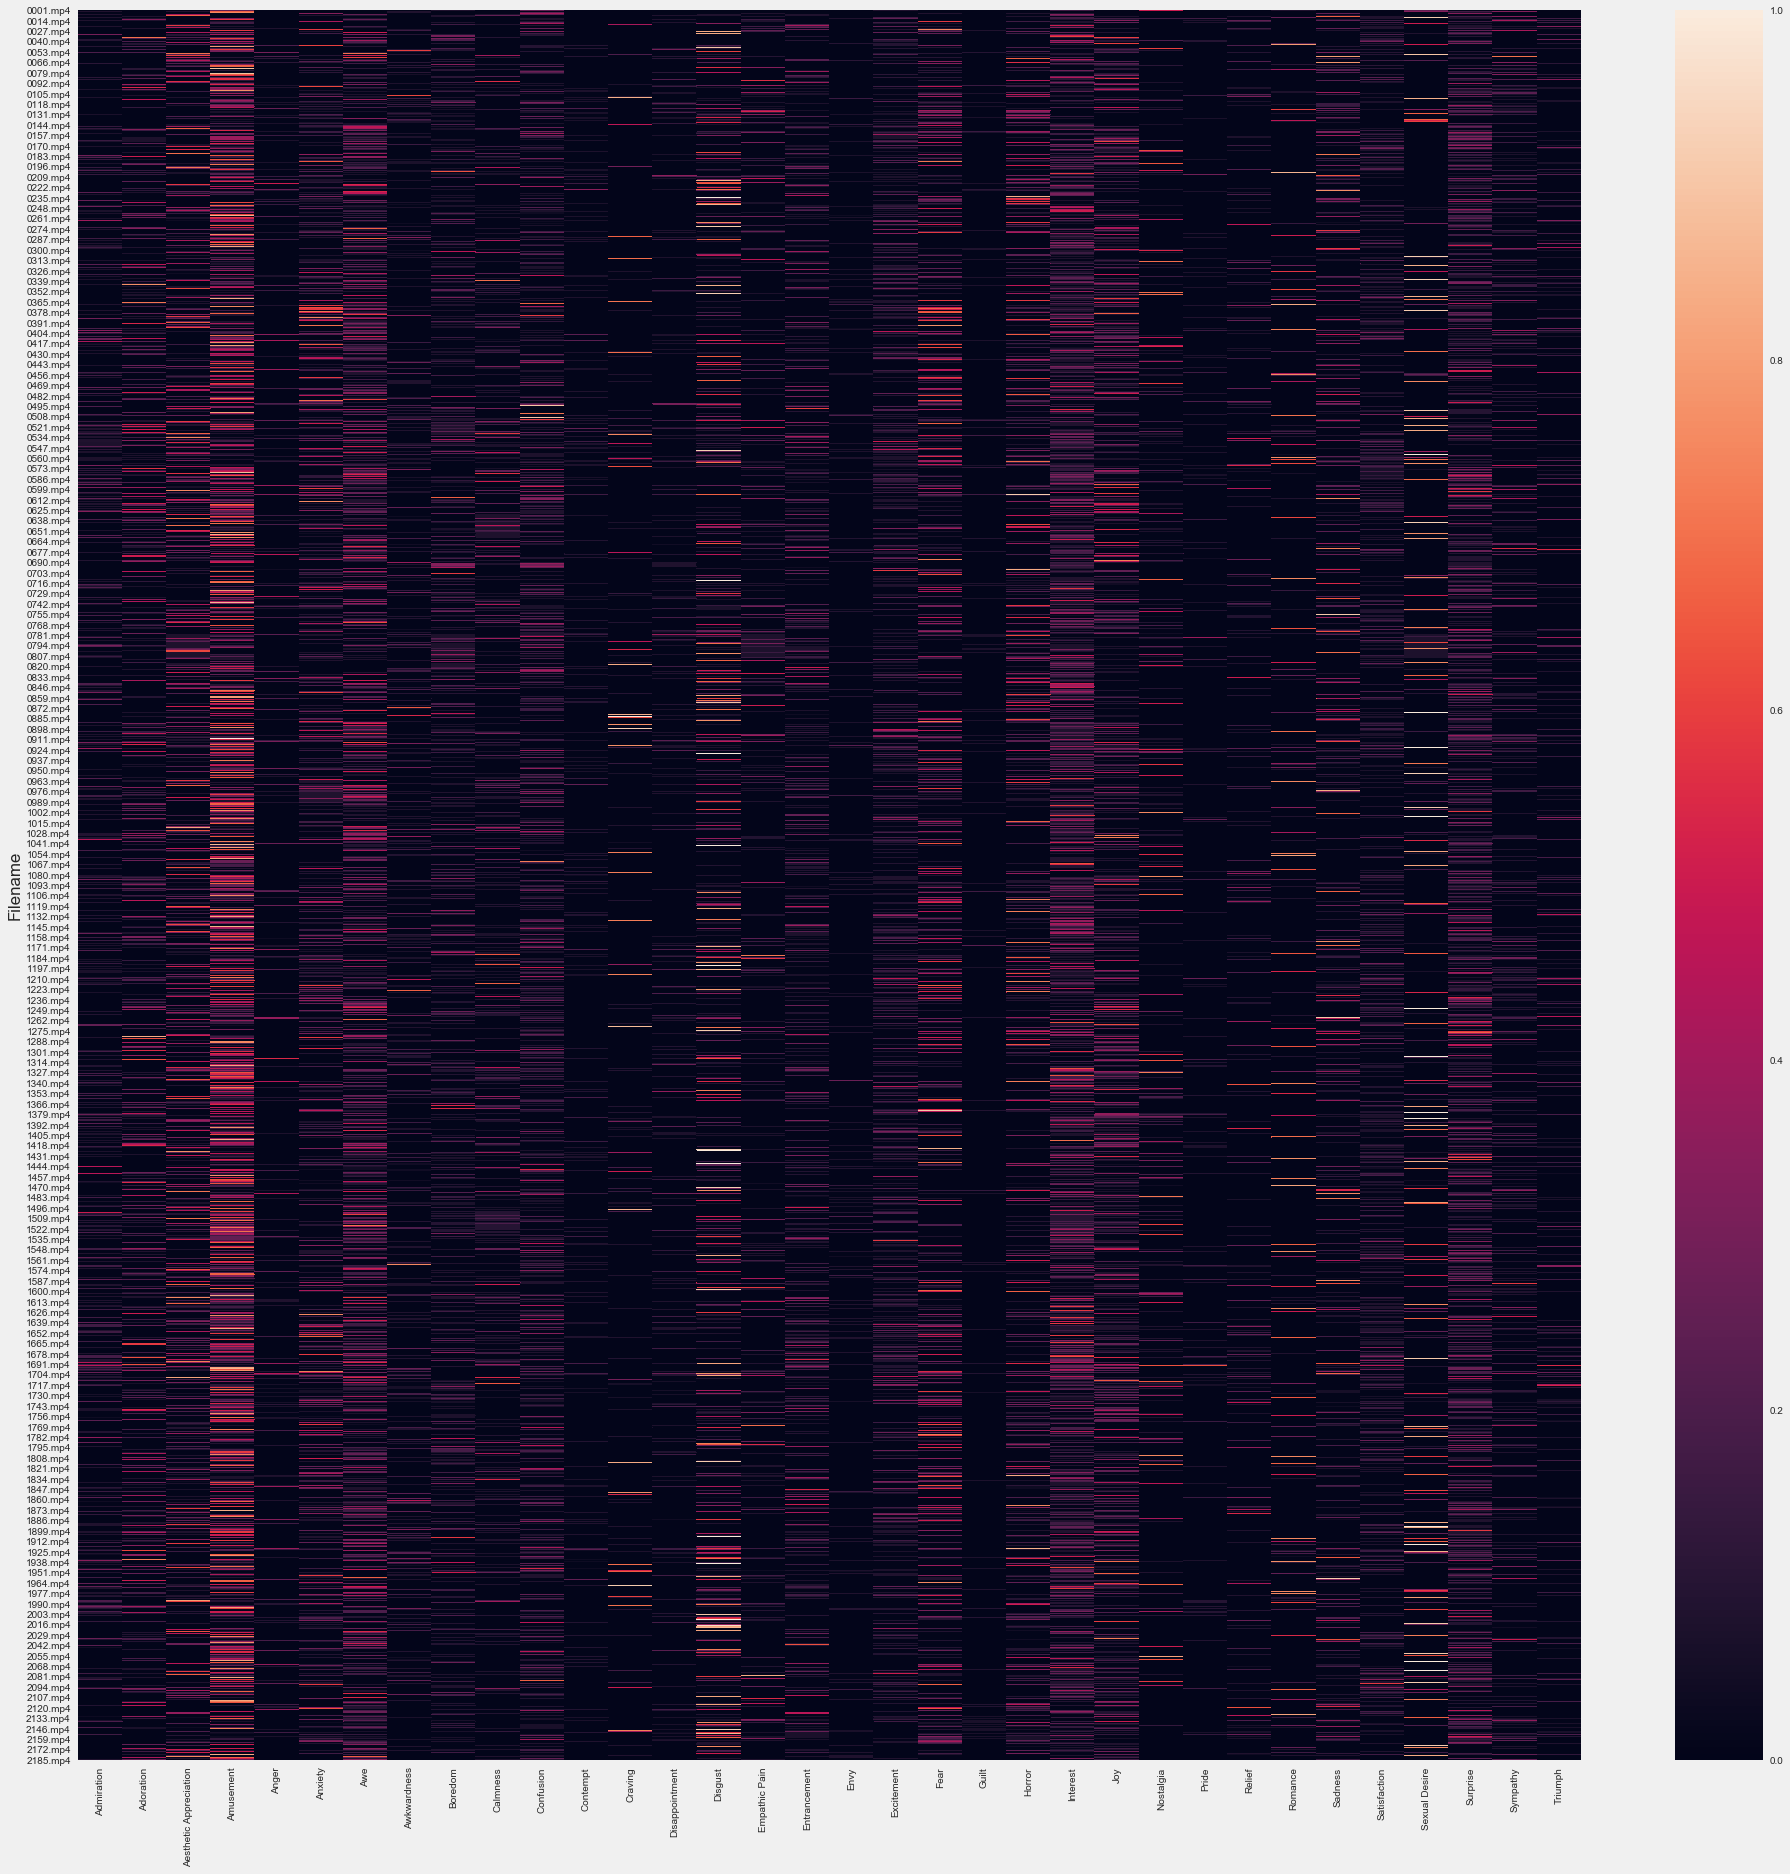

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30,30))
sns.heatmap(labeldf[labeldf.columns[:34]])

In [220]:
#a='admiration, adoration, aesthetic appreciation, amusement, anxiety, awe, awkwardness, boredom, calmness, confusion, craving, disgust, empathic pain, entrancement, envy, excitement, fear, horror, interest, joy, nostalgia, romance, sadness, satisfaction, sexual desire, sympathy,triumph'
#a=a.replace(', ',',').split(',')
#a,b
#set(a).difference(set(b))
#set(b).difference(set(a))
#len(a),len(labeldf.columns[:34]),len()
#b=[x.lower() for x in labeldf.columns[:34]]
#emocols,affectdimcols,freewordcols


In [64]:
# sns.heatmap(labeldf[labeldf.columns[30:50]])
# sns.heatmap(labeldf[labeldf.columns[30:50]].values)
# labeldf[labeldf['zeal'] > 0.0].head(1).values
# labeldf[labeldf['zeal'] > 0.0]

In [65]:
#plt.pcolor(labeldf)
#len(labeldf.columns)
#labeldf.loc['0001.mp4'].sum(axis=0)
#labeldf.loc['0050.mp4'][affectdimcols].sum()    

In [162]:
for f in labeldf.index :
    r=[labeldf.loc[f].sum(), labeldf.loc[f][emocols].sum(),labeldf.loc[f][affectdimcols].sum(),labeldf.loc[f][freewordcols].sum()]
    print(r)

[48.444528, 2.0000080000000002, 45.111200000000004, 1.3333199999999998]
[63.777709, 1.6666689999999997, 60.5555, 1.5555399999999997]
[76.52770899999999, 1.7499990000000003, 73.5555, 1.22221]
[66.38875599999999, 1.166666, 64.22210000000001, 0.9999899999999999]
[50.55559199999999, 1.666662, 47.4445, 1.4444299999999999]
[76.08331199999999, 1.7500019999999998, 73.11110000000001, 1.22221]
[64.36115199999999, 1.583332, 61.4445, 1.33332]
[75.194301, 1.7500010000000001, 72.3332, 1.1111]
[63.305640999999994, 1.7500010000000001, 60.000099999999996, 1.5555400000000001]
[90.97209900000001, 1.7500090000000004, 88.22210000000001, 0.9999899999999999]
[80.194509, 1.750019, 77.4445, 0.9999899999999998]
[78.583168, 1.9166780000000003, 75.66650000000001, 0.9999899999999999]
[90.027785, 1.9166650000000003, 86.7778, 1.33332]
[84.33336499999997, 2.000005, 80.5556, 1.7777599999999998]
[62.02781499999999, 1.9166750000000001, 58.5556, 1.5555399999999997]
[74.722126, 1.833336, 71.8888, 0.9999899999999999]
[85.7

[89.230782, 2.2307819999999996, 85.8889, 1.1111]
[78.504193, 1.615393, 75.7777, 1.1111]
[69.16241600000001, 1.3846260000000001, 66.7778, 0.9999899999999999]
[66.888858, 2.0000179999999994, 63.333299999999994, 1.55554]
[75.837388, 1.6153879999999998, 73.1109, 1.1111]
[84.13691899999999, 1.6923089999999998, 81.2224, 1.22221]
[81.504486, 1.6153959999999998, 78.88909999999998, 0.9999899999999999]
[73.69221199999998, 1.692312, 70.8888, 1.1111]
[76.17107799999998, 1.6153879999999998, 73.5557, 0.9999899999999999]
[91.085292, 1.307692, 88.6665, 1.1110999999999998]
[71.316159, 1.5384589999999998, 68.6666, 1.1111]
[76.16233199999999, 1.384622, 73.5555, 1.22221]
[63.239451999999986, 1.461542, 60.666799999999995, 1.11111]
[80.84631, 1.8461699999999999, 77.4446, 1.55554]
[50.539576999999994, 2.428567, 46.8888, 1.2222099999999998]
[87.82547899999999, 1.714289, 85.1112, 0.9999899999999999]
[80.349325, 1.5714349999999997, 77.77789999999999, 0.99999]
[96.81746599999998, 1.9285759999999998, 93.888900000

[78.69235599999999, 1.692316, 75.55560000000001, 1.4444400000000002]
[74.76069599999998, 1.5384759999999997, 71.8889, 1.33332]
[80.70080200000001, 1.923092, 77.5555, 1.2222099999999998]
[80.102499, 1.769239, 76.55550000000001, 1.77776]
[80.83764499999998, 1.6153950000000001, 77.5556, 1.66665]
[80.59835199999999, 2.1538619999999997, 76.3334, 2.11109]
[57.128249000000004, 2.4615489999999998, 52.55559999999999, 2.1111000000000004]
[79.05970299999998, 1.6153929999999999, 76.2221, 1.22221]
[81.50422699999999, 1.6153870000000004, 78.33330000000001, 1.5555399999999997]
[81.84610199999999, 1.8461520000000002, 78.33330000000001, 1.6666499999999997]
[68.89751299999999, 2.230773, 65.1112, 1.5555399999999997]
[72.47024799999998, 1.6923080000000001, 69.2224, 1.55554]
[56.230905, 1.230785, 53.666799999999995, 1.3333199999999998]
[57.350263999999996, 1.4615540000000002, 54.6665, 1.2222099999999998]
[82.675335, 2.2307849999999996, 78.77789999999999, 1.6666499999999997]
[82.89748599999999, 1.2307759999

[53.083189999999995, 1.75, 50.333200000000005, 0.9999899999999999]
[83.3664, 1.7000000000000002, 80.55529999999999, 1.1111]
[84.64989999999999, 1.65, 81.88879999999999, 1.1111]
[67.20009999999999, 1.2000000000000002, 64.889, 1.1111]
[70.47758000000002, 1.7, 67.8887, 0.8888799999999999]
[63.044479999999986, 1.6, 60.5556, 0.8888799999999999]
[87.16685799999999, 1.499998, 83.8891, 1.77776]
[48.027801, 1.916671, 44.6667, 1.44443]
[58.47235499999999, 3.2500150000000003, 53.6668, 1.5555399999999997]
[48.30562799999999, 2.416658, 44.000099999999996, 1.8888699999999998]
[77.05559199999999, 2.1666619999999996, 73.4445, 1.4444299999999999]
[78.388842, 1.500002, 75.3333, 1.5555399999999997]
[66.972111, 2.083341, 63.111000000000004, 1.7777699999999999]
[84.41659399999999, 2.416664, 80.55550000000001, 1.4444299999999999]
[79.638825, 2.416665, 75.4444, 1.77776]
[75.86101799999999, 2.416678, 71.8888, 1.55554]
[81.13867599999999, 1.916666, 77.9998, 1.22221]
[60.27777, 2.50001, 56.0, 1.7777599999999998

[81.45453599999999, 1.4545460000000001, 79.00000000000001, 0.9999899999999998]
[76.959528, 1.181818, 74.5555, 1.2222099999999998]
[60.919006, 1.363636, 57.6665, 1.8888699999999998]
[91.02004300000002, 1.909093, 87.4443, 1.66665]
[53.95947599999999, 2.181826, 50.111, 1.66665]
[56.323204999999994, 1.545465, 53.2222, 1.5555399999999997]
[69.282709, 1.727289, 66.22210000000001, 1.3333199999999998]
[85.55564399999999, 1.999994, 81.88899999999998, 1.66665]
[69.020326, 1.9090960000000001, 65.66680000000001, 1.4444299999999999]
[81.191926, 1.6363660000000002, 77.7778, 1.7777599999999998]
[63.61611699999999, 1.7272669999999999, 60.3333, 1.5555499999999998]
[52.868787, 3.090917, 47.889, 1.8888699999999998]
[82.30301499999997, 1.636365, 79.00000000000001, 1.6666499999999997]
[81.84837199999998, 2.1818320000000004, 78.111, 1.5555400000000001]
[72.595868, 1.8181880000000001, 68.7777, 1.9999799999999999]
[85.838405, 1.7272850000000002, 82.88889999999999, 1.22222]
[66.686822, 1.909102, 63.4444, 1.333

[87.61094600000001, 1.833336, 84.55539999999999, 1.22221]
[59.805324999999996, 1.916675, 56.22200000000001, 1.66665]
[83.416785, 2.416665, 79.6668, 1.3333199999999998]
[54.010909999999996, 1.9000000000000001, 50.8887, 1.22221]
[75.21108999999998, 2.1, 72.1111, 0.9999899999999999]
[70.56672, 1.9, 67.3334, 1.3333199999999998]
[69.93329, 1.6, 67.33330000000001, 0.9999899999999999]
[61.87771000000001, 2.1, 58.5555, 1.2222099999999998]
[62.06650999999999, 1.4000000000000001, 59.4443, 1.2222099999999998]
[74.68889999999999, 1.8, 71.77780000000001, 1.1111]
[85.63332000000001, 1.3000000000000003, 83.0, 1.33332]
[55.93350999999999, 1.6, 53.1113, 1.22221]
[58.14441999999999, 1.7000000000000002, 55.1111, 1.33332]
[76.84441, 1.4, 74.2222, 1.22221]
[75.52213, 2.3000000000000003, 71.7777, 1.44443]
[68.11131, 2.0, 64.8891, 1.22221]
[73.9, 1.9, 70.8889, 1.1111]
[64.35540999999999, 1.8000000000000003, 61.3332, 1.2222099999999998]
[56.977719999999984, 2.2, 53.4444, 1.33332]
[61.50003, 1.5000000000000002

[79.583195, 1.250005, 77.33319999999999, 0.9999899999999999]
[47.861028, 1.750008, 44.7777, 1.3333199999999998]
[49.44440600000001, 1.666666, 46.2222, 1.55554]
[82.83330600000001, 1.1666660000000002, 80.1111, 1.5555399999999997]
[64.111183, 1.3333430000000002, 61.2223, 1.55554]
[70.75003, 1.08334, 68.6667, 0.9999899999999999]
[57.416449, 2.083339, 54.11090000000001, 1.22221]
[63.02764499999999, 1.5833249999999999, 60.111000000000004, 1.33332]
[63.333249999999985, 2.00001, 59.777699999999996, 1.55554]
[74.10098, 1.5454500000000002, 71.1111, 1.4444299999999999]
[69.565576, 1.4545560000000002, 66.7777, 1.3333199999999998]
[69.23244799999999, 1.454548, 66.6668, 1.1111]
[72.242338, 1.9090880000000001, 68.6666, 1.6666499999999997]
[57.959686, 3.1818360000000006, 53.111200000000004, 1.6666499999999997]
[62.212090999999994, 1.5454610000000002, 59.2222, 1.4444299999999999]
[57.312927999999985, 2.090918, 53.99980000000001, 1.22221]
[82.21199800000001, 1.545468, 79.22210000000001, 1.4444299999999

[58.785584, 1.785734, 55.333200000000005, 1.6666499999999997]
[60.642875999999994, 1.642866, 57.77779999999999, 1.22221]
[52.389140999999995, 1.5000109999999998, 49.4447, 1.4444299999999999]
[53.087213999999996, 2.642874, 48.8888, 1.55554]
[54.571363999999996, 1.571434, 51.5555, 1.4444299999999997]
[70.039664, 1.9285639999999997, 67.0, 1.1111]
[87.56332599999999, 1.7857159999999999, 84.55539999999999, 1.22221]
[85.68254999999999, 1.5714299999999999, 82.7778, 1.3333199999999998]
[53.523864999999994, 1.857155, 50.444500000000005, 1.22221]
[55.507836999999995, 1.285717, 52.9999, 1.2222199999999999]
[86.825386, 1.7142859999999998, 84.00000000000001, 1.1111]
[84.047578, 1.7142979999999999, 81.44439999999999, 0.88888]
[84.865147, 1.6428569999999998, 82.22229999999999, 0.9999899999999999]
[50.53960599999999, 1.4285759999999998, 47.6666, 1.4444299999999999]
[77.90476599999998, 1.5714259999999998, 74.7778, 1.5555400000000001]
[59.174710999999995, 1.285721, 56.888999999999996, 0.9999899999999999

[85.707117, 1.818197, 82.55559999999998, 1.3333199999999998]
[77.77773499999999, 2.000005, 74.33330000000001, 1.4444299999999999]
[52.646529, 1.090909, 50.3334, 1.22222]
[80.39381499999999, 1.7272850000000002, 77.22210000000001, 1.4444299999999999]
[73.878709, 1.5454590000000001, 70.6666, 1.66665]
[78.72721599999998, 1.727286, 75.55550000000001, 1.4444299999999999]
[60.969803, 1.636373, 57.888999999999996, 1.4444299999999999]
[78.92924699999999, 1.818187, 75.3333, 1.77776]
[61.979732, 2.090912, 58.5555, 1.3333199999999998]
[55.838316, 2.7272960000000004, 51.7777, 1.3333199999999998]
[80.77782699999999, 2.000007, 77.4445, 1.33332]
[68.51514900000001, 2.181829, 65.0, 1.33332]
[80.757626, 2.090926, 77.5556, 1.1111]
[70.82814499999999, 1.2727350000000002, 68.3332, 1.22221]
[75.52529799999999, 1.636368, 72.4445, 1.4444299999999999]
[82.77783699999999, 2.000007, 79.3334, 1.4444299999999999]
[79.71715599999999, 1.272726, 77.00000000000001, 1.44443]
[85.787745, 1.454545, 83.2221, 1.1111]
[78.3

[66.34450999999999, 1.9000000000000001, 63.2223, 1.2222099999999998]
[66.83328999999999, 1.5, 64.33330000000001, 0.9999899999999999]
[77.972002, 1.7500020000000003, 75.1109, 1.1111]
[51.49996899999999, 1.833339, 48.2222, 1.4444299999999999]
[76.66665799999998, 1.333338, 74.0, 1.33332]
[64.055443, 1.5000030000000002, 60.999900000000004, 1.55554]
[74.88900199999999, 1.6666719999999997, 71.7779, 1.4444299999999999]
[79.416626, 1.750006, 76.3333, 1.33332]
[73.27762200000001, 1.5000019999999998, 70.44429999999998, 1.3333199999999998]
[73.27774899999999, 1.8333290000000002, 70.1111, 1.33332]
[92.33340299999999, 1.666673, 89.2223, 1.4444299999999999]
[83.500049, 1.833339, 80.4445, 1.2222099999999998]
[53.33334299999999, 1.333333, 50.777800000000006, 1.22221]
[85.111175, 1.666665, 82.2223, 1.22221]
[70.36119799999999, 1.916668, 67.0001, 1.4444299999999999]
[63.97228199999999, 1.4166619999999999, 61.2223, 1.3333199999999998]
[72.91658199999999, 1.916672, 69.77770000000001, 1.22221]
[66.86108500

[54.60604599999999, 2.2727459999999997, 51.2222, 1.1111]
[81.27272699999999, 2.2727370000000002, 77.99999999999999, 0.9999899999999999]
[85.470614, 1.4705940000000002, 82.6667, 1.3333199999999998]
[91.56217, 2.11765, 88.1112, 1.3333199999999998]
[64.810552, 1.5882420000000002, 62.000099999999996, 1.22221]
[67.052326, 1.941186, 63.555600000000005, 1.55554]
[90.72544599999999, 2.058816, 87.2222, 1.4444299999999999]
[90.549102, 1.8823720000000002, 87.2223, 1.44443]
[87.823426, 1.8235360000000003, 84.99990000000001, 0.9999899999999999]
[90.21558, 1.8823599999999998, 86.99989999999998, 1.33332]
[69.346478, 1.235298, 67.2223, 0.8888799999999999]
[72.83009999999999, 1.9411900000000002, 69.66669999999999, 1.2222099999999998]
[85.02628, 1.4706, 82.6668, 0.8888799999999999]
[75.58171, 1.4706000000000001, 72.8889, 1.2222099999999998]
[86.156832, 1.823522, 83.11110000000001, 1.22221]
[72.29413600000001, 1.294126, 69.77780000000001, 1.22221]
[65.03913399999999, 1.705884, 61.6666, 1.6666499999999997

[80.083101, 1.7500010000000001, 77.22200000000001, 1.1111]
[63.18051799999999, 1.6249980000000002, 60.2222, 1.33332]
[73.22223500000001, 1.333335, 70.7778, 1.1111]
[87.19429899999999, 1.416669, 84.3332, 1.4444299999999999]
[65.999824, 1.333334, 63.6665, 0.9999899999999999]
[78.55538299999999, 1.6666729999999998, 75.66650000000001, 1.2222099999999998]
[74.27764499999999, 1.833335, 71.2221, 1.2222099999999998]
[88.30555799999999, 2.083338, 84.88889999999999, 1.3333199999999998]
[84.583252, 1.5833320000000002, 81.6666, 1.3333199999999998]
[81.44444499999999, 1.666665, 78.8889, 0.8888799999999999]
[70.972285, 1.4166750000000001, 68.3334, 1.22221]
[81.91671299999999, 1.250003, 79.4445, 1.22221]
[75.333356, 1.333336, 72.66669999999999, 1.33332]
[77.166535, 1.8333249999999999, 74.11099999999999, 1.22221]
[89.305641, 2.0833310000000003, 86.0001, 1.22221]
[59.83338499999999, 1.499995, 57.3334, 0.9999899999999998]
[84.055491, 2.500001, 80.55550000000001, 0.9999899999999999]
[55.111026, 1.0000060

[81.757609, 1.090909, 79.5556, 1.1111]
[70.27271599999999, 1.272726, 68.0, 0.9999899999999999]
[75.919329, 1.3636490000000001, 73.6668, 0.8888799999999999]
[59.434255, 1.545465, 56.8888, 0.9999899999999999]
[62.388921999999994, 1.500012, 59.6667, 1.22221]
[62.38889699999999, 1.500007, 59.8889, 0.9999899999999999]
[62.19187599999999, 1.6363760000000003, 59.444399999999995, 1.1111]
[77.91923799999999, 1.363638, 75.4445, 1.1111]
[82.583355, 1.916675, 79.7778, 0.88888]
[80.30562699999999, 2.083327, 77.1112, 1.1111]
[80.138875, 1.9166750000000001, 77.1111, 1.1110999999999998]
[80.16662199999999, 1.8333420000000002, 77.4444, 0.8888799999999999]
[71.33345899999998, 1.6666690000000002, 68.6668, 0.99999]
[68.80571499999999, 1.583335, 66.3335, 0.8888799999999999]
[86.694469, 1.9166690000000002, 83.6667, 1.1110999999999998]
[74.805508, 2.250008, 71.4444, 1.1111]
[66.77786799999998, 1.666678, 64.1112, 0.9999899999999999]
[56.361284999999995, 1.9166750000000001, 53.22239999999999, 1.22221]
[67.4999

## Analysis of emotion categories ( 34 ) 
27 of them are prioritrized

In [22]:
#emocols

In [66]:
emodf = labeldf[emocols]

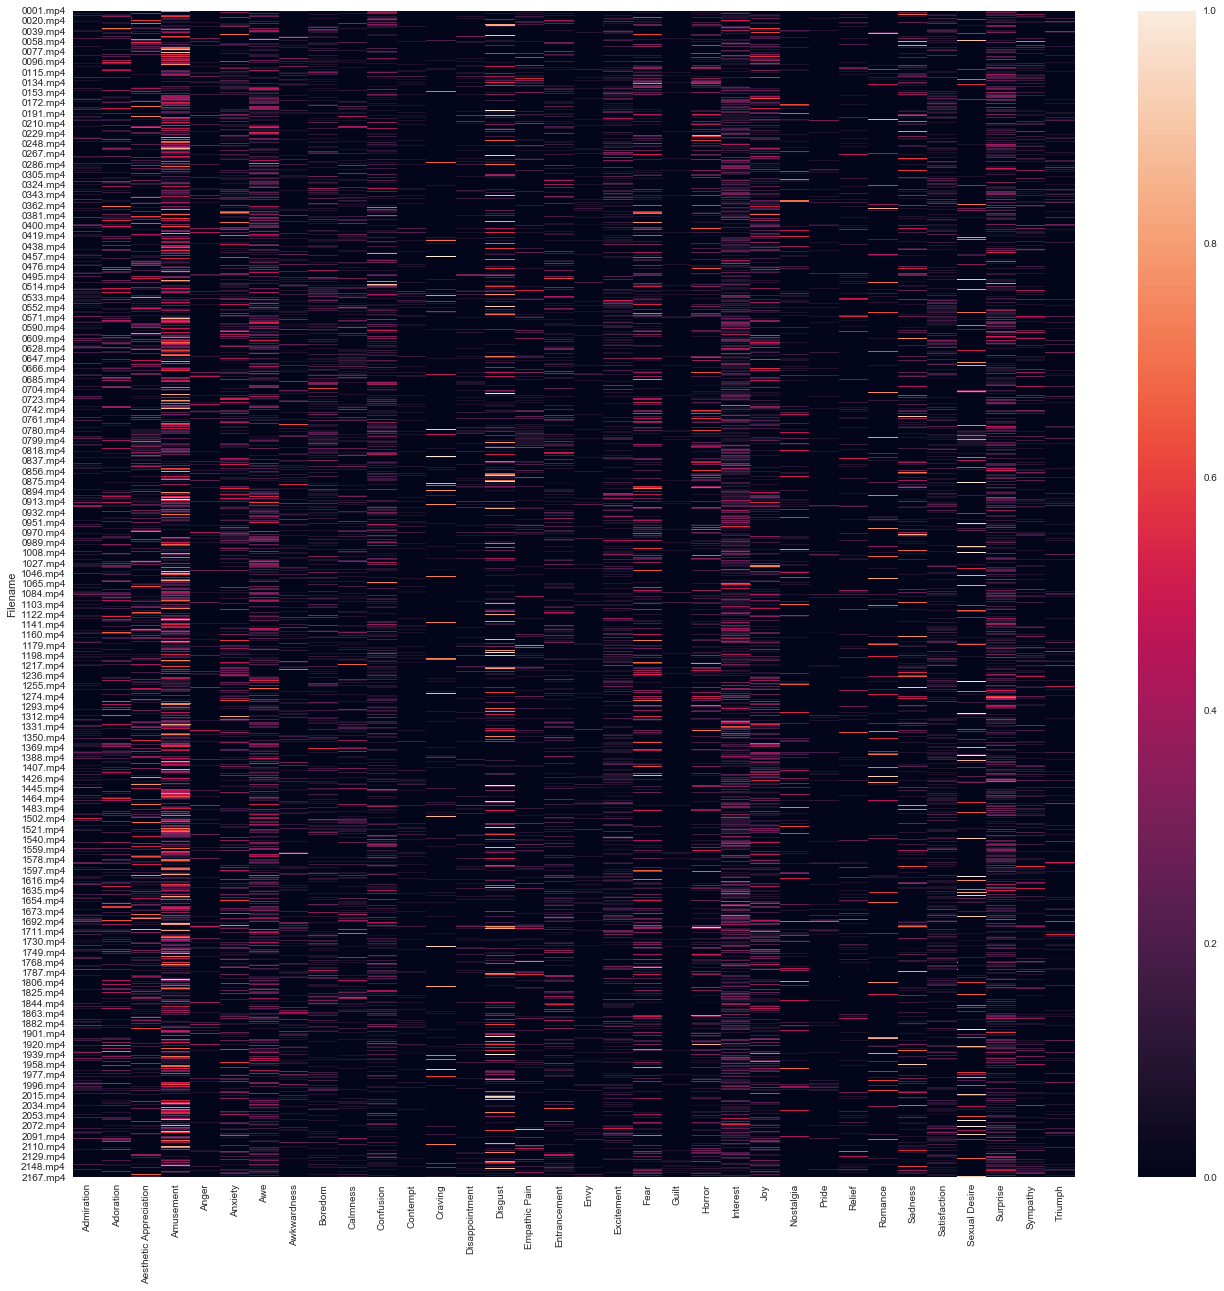

In [68]:
plt.style.use('seaborn-white')#switch to seaborn style

plt.figure(figsize=(20,20))
sns.heatmap(emodf)

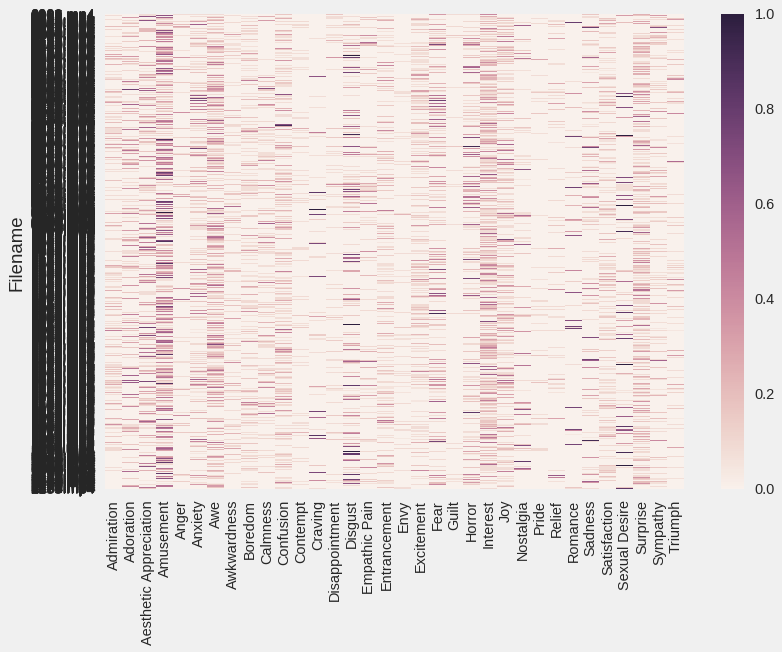

In [366]:

plt.style.use('fivethirtyeight')
sns.heatmap(emodf)

In [43]:
#corr_mat.columns

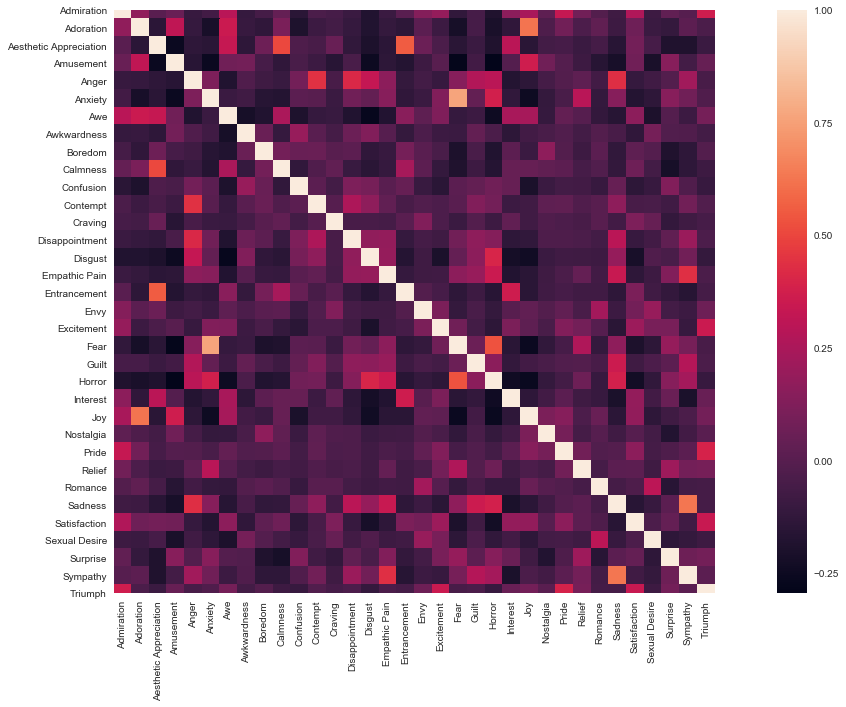

In [69]:
# GETTING Correllation matrix
corr_mat=emodf.corr(method='pearson')
plt.figure(figsize=(20,10))
#corr_mat.sort_values(by=list(corr_mat.columns))
#sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
sns.heatmap(corr_mat,vmax=1,square=True,annot=False)


## Analysis of Affective Dimensions 14 features 


In [70]:
#set(labeldf.columns[34:48]),
#set(affectdimcols)

In [71]:
affectdf = labeldf[affectdimcols]

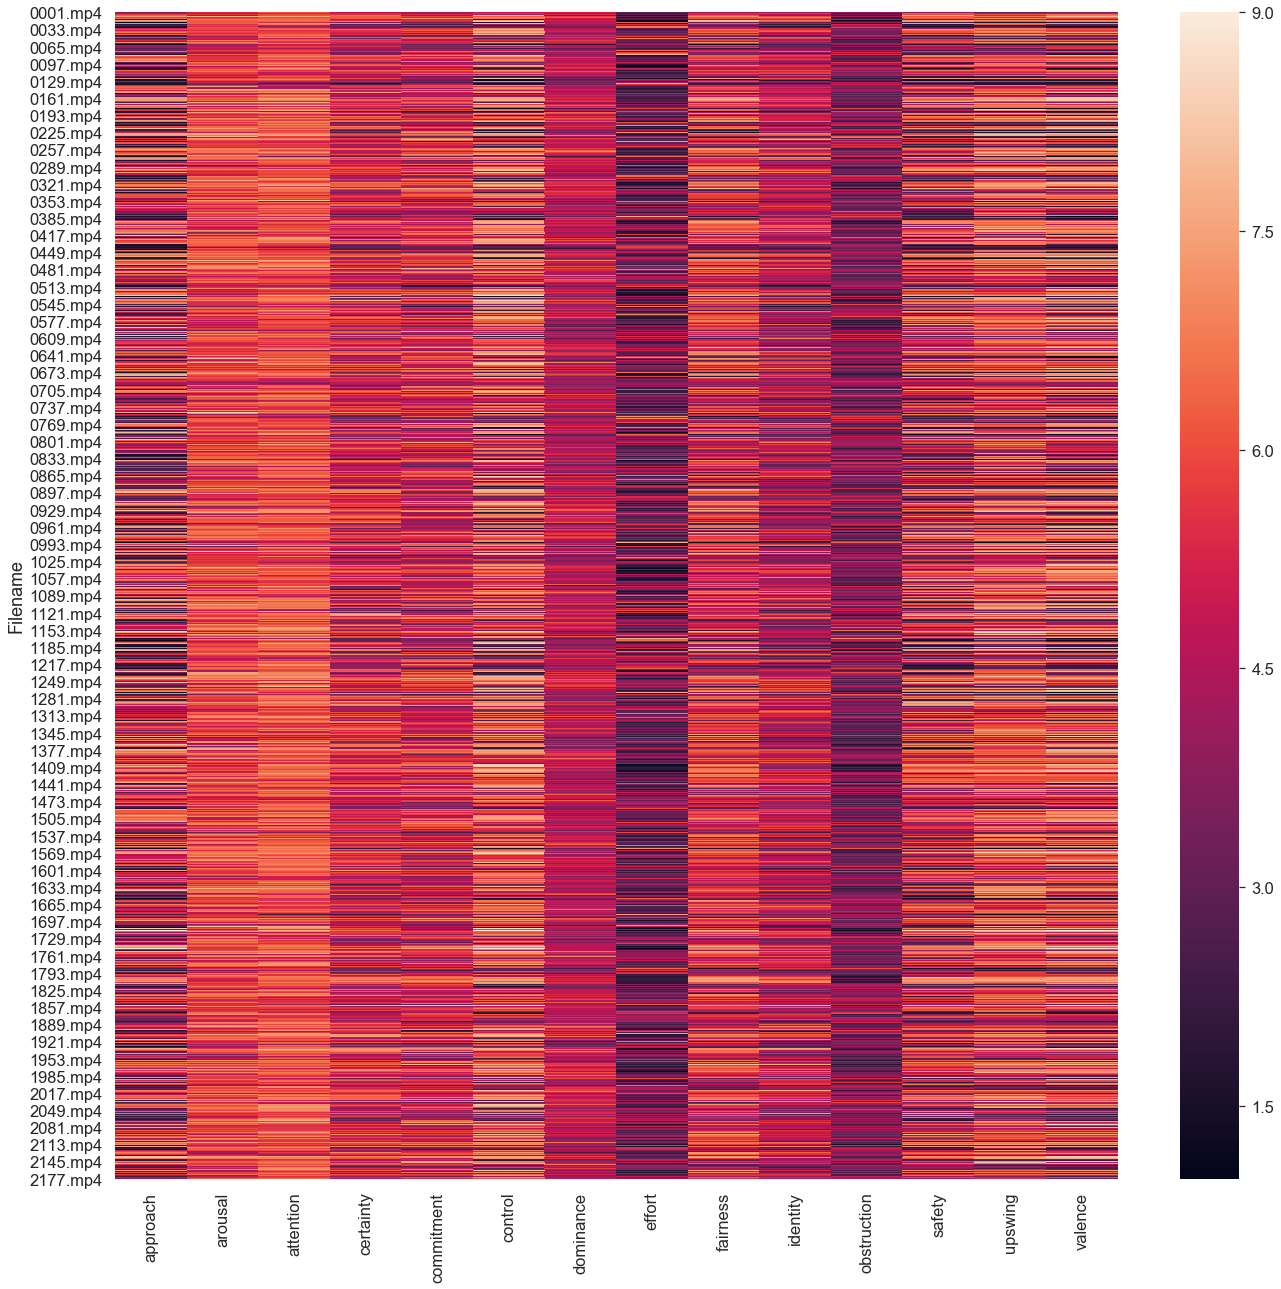

In [72]:
sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.5)

plt.figure(figsize=(20,20))
sns.heatmap(affectdf)

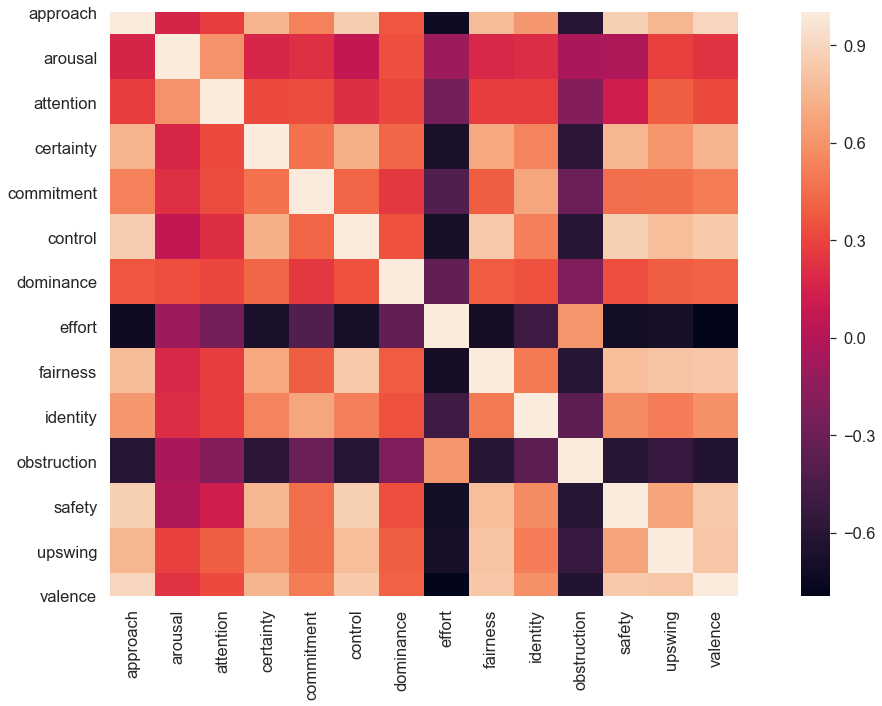

In [73]:
# GETTING Correllation matrix
corr_mat=affectdf.corr(method='pearson')
plt.figure(figsize=(20,10))
#sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
sns.heatmap(corr_mat,vmax=1,square=True,annot=False)


## Analysis of free word usage, 600 words 


In [74]:
freeworddf=labeldf[freewordcols]

In [75]:
#plt.figure(figsize=(20,20))
#sns.heatmap(freeworddf)

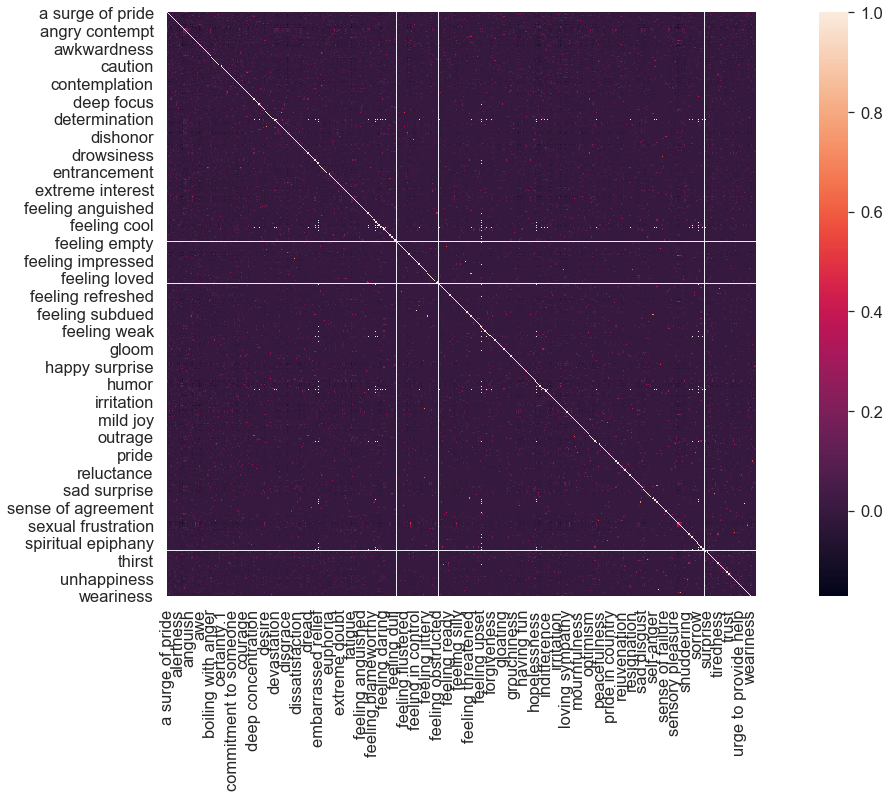

In [76]:
# GETTING Correllation matrix
corr_mat=freeworddf.corr(method='pearson')
plt.figure(figsize=(20,10))
#sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')
sns.heatmap(corr_mat,vmax=1,square=True,annot=False)


## Features

In [77]:
%%time
## generate the feature dictionary
global videodict

def readfeatures(fnamelist):
    for video in fnamelist:
        df = pd.DataFrame(np.genfromtxt( video ))
        df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
        vno = video.split('/')[-1].split('.')[0] +'.mp4'
        videodict[vno] = df

feature_cols = ['framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
videodict = {}
fnamelist = sorted(glob.glob(featdir+'*'))
readfeatures(fnamelist)

CPU times: user 2.38 s, sys: 60 ms, total: 2.44 s
Wall time: 3.55 s


In [78]:
#videodict.keys(),fnamelist
#videodict['0001.mp4'][feature_cols].describe().transpose()
#videodict['0001.mp4'][feature_cols].describe()
#videodict.keys(), labeldf.index

In [79]:
#f = videodict['0001'][feature_cols].describe()
#n,m = f.shape
#row= f.values.reshape(n*m)
#l =row.tolist()
#l

In [80]:
len(videodict)

2185

In [81]:
def getTrainData( features,videodict,flist=fnamelist):
    m=len(videodict)
    X=[]
    emoY=[]
    affectY=[]
    for video in flist:
        f = videodict[video][features].describe()
        n,m = f.shape
        row= f.values.reshape(n*m).tolist()
        X.append(row)
        emoY.append(labeldf.loc[video][emocols].values.tolist())
        affectY.append(labeldf.loc[video][affectdimcols].values.tolist())
        #print(video,videodict[video].describe().transpose())
    return np.array(X),np.array(emoY),np.array(affectY)

In [82]:
%%time
##Sample movies

dataX, dataemoY,dataaffectY = getTrainData(feature_cols,videodict,flist=['0001.mp4','0002.mp4'])

CPU times: user 61 ms, sys: 3.84 ms, total: 64.9 ms
Wall time: 82.7 ms


In [83]:
%%time
##all movies

dataX, dataemoY,dataaffectY = getTrainData(feature_cols,videodict,flist=videodict.keys())

CPU times: user 39.9 s, sys: 47.4 ms, total: 39.9 s
Wall time: 40 s


In [84]:
dataX.shape,dataemoY.shape,dataaffectY.shape

((2185, 72), (2185, 34), (2185, 14))

## Split the data into train,dev,test dets

In [88]:
regstdscaler=StandardScaler()
regstdscaler.fit(dataX)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [89]:
X = StandardScaler().fit_transform(dataX)
Y = dataemoY
X_train, X_tmp, y_train, y_tmp = train_test_split(X, Y , test_size=.4, random_state=34)
X_dev, X_test, y_dev, y_test = train_test_split(X_tmp, y_tmp , test_size=.5, random_state=25)

In [90]:
[t.shape for t in (X_train,X_dev, X_test, y_train,y_dev, y_test)]

[(1311, 72), (437, 72), (437, 72), (1311, 34), (437, 34), (437, 34)]

### Train and test models

In [87]:
# Classifiers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [91]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]


classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#### iterate over classifiers
''' 
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(score)
'''

' \nfor name, clf in zip(names, classifiers):\n    clf.fit(X_train, y_train)\n    score = clf.score(X_test, y_test)\n    print(score)\n'

## Regression Models for multioutput

In [92]:
#Regressors
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model


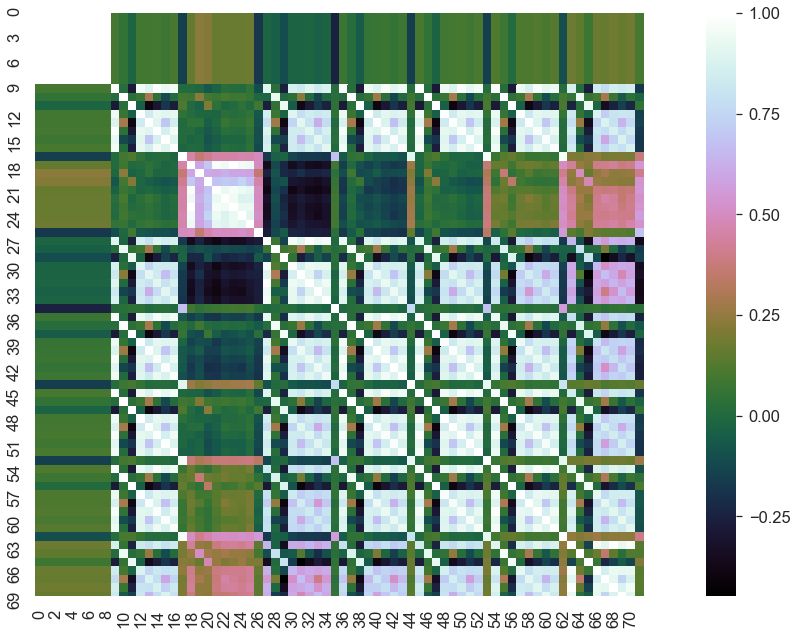

In [93]:
# GETTING Correllation matrix fro training data whic is the descriptive stats 
# all the video
corr_mat=pd.DataFrame(X_train).corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=False,cmap='cubehelix')


Text(0, 0.5, 'Cumulative explained variance')

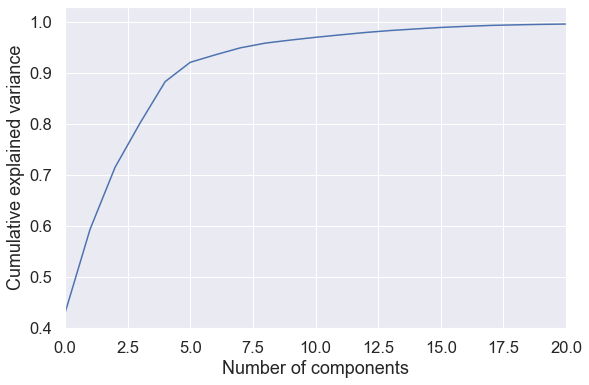

In [94]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### 5 components can explain more than %90

(-10, 10)

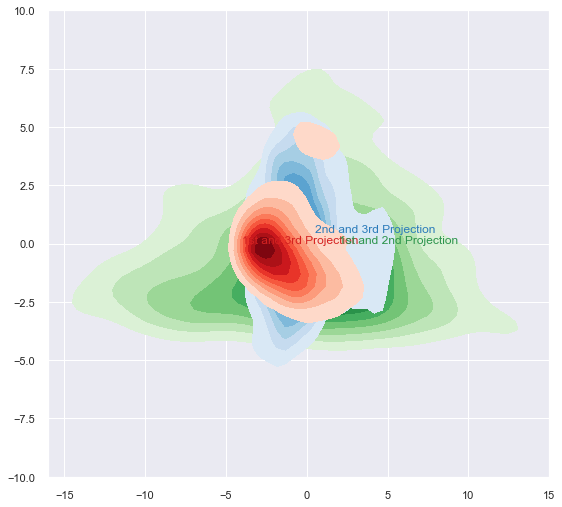

In [95]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_train)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-16,15)
plt.ylim(-10,10)

## Multioutput regression

In [97]:

from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process.gpr import GaussianProcessRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#from sklearn.grid_search import GridSearchCV 
from sklearn.model_selection import learning_curve,GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats.mstats import pearsonr



In [98]:
reg_names=['GaussianProcessRegressor','Gradient Boosting', 'RandomForest', 'SVM', 'KNN', 'Ridge' ]

regressors = [
    GaussianProcessRegressor(),
    GradientBoostingRegressor(random_state=42),
    RandomForestRegressor(max_depth=42),
    SVR(C=10,gamma=0.001,kernel='rbf'),
    KNeighborsRegressor(n_neighbors=5,weights='uniform'),
    Ridge()
]

In [99]:
def regscores(y_true,y_pred,prnt=False):
    # The mean squared error
    mse = mean_squared_error(y_true, y_pred)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_true, y_pred)
    
    pear=pearsonr(y_true, y_pred)[0]
    
    if prnt:
        print("Mean squared error mse: %.5f" % mse )
        print('Variance score r2: %.5f' % r2)
        print('pearsor r2: %.5f'% pear)
    
    return mse,r2

In [100]:
%%time
def compare(reg_names, regressors):
    train_mse = dict()
    dev_mse = dict()
    test_mse = dict()
    train_r2 = dict()
    dev_r2 = dict()
    test_r2 = dict()
    
    train_score = dict()
    dev_score = dict()
    test_score = dict()
    
    is_print= False

    #### iterate over regressors
    for name, model in zip(reg_names, regressors):
        print(name)
        reg = MultiOutputRegressor(model)
        reg.fit(X_train, y_train)

        train_score[name] = reg.score(X_train, y_train)
        dev_score[name] = reg.score(X_dev,y_dev)
        test_score[name] = reg.score(X_test,y_test)
        
        train_mse[name], train_r2[name] = regscores(y_train, reg.predict(X_train),prnt=is_print)
        dev_mse[name], dev_r2[name] = regscores(y_dev, reg.predict(X_dev),prnt=is_print) 
        test_mse[name], test_r2[name] = regscores(y_test, reg.predict(X_test),prnt=is_print)

    msedf = pd.DataFrame({ 'train': train_mse,
                          'dev':dev_mse,
                          'test':test_mse})

    r2df = pd.DataFrame({ 'train': train_r2,
                          'dev':dev_r2,
                          'test':test_r2})

    scoredf = pd.DataFrame({ 'train': train_score,
                          'dev':dev_score,
                          'test':test_score})
        
    msedf.plot(kind='bar')

    r2df.plot(kind='bar')
    
    scoredf.plot(kind='bar')
    
    return msedf,r2df,scoredf

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


GaussianProcessRegressor
Gradient Boosting
RandomForest


/home/yt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yt/anaconda3/lib/python3.7/site-packages/sklearn/ensem

SVM
KNN
Ridge


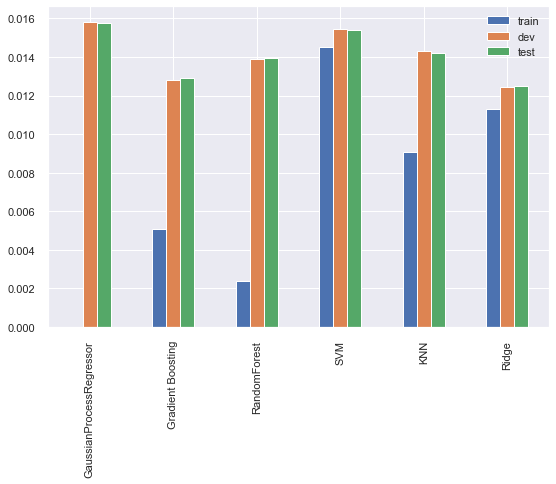

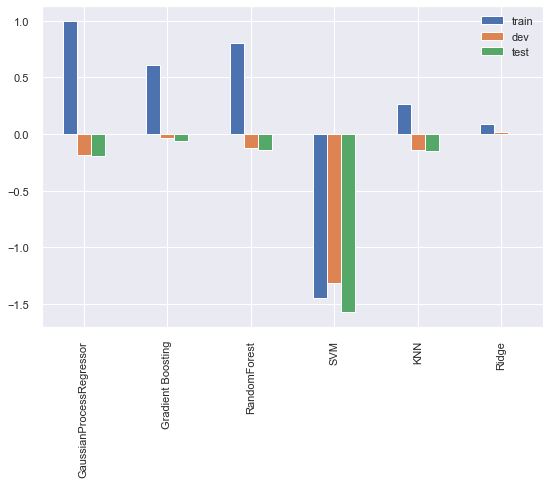

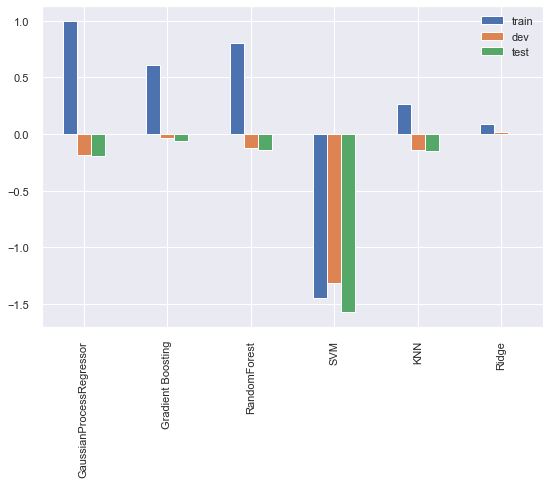

In [101]:
m,r,s = compare(reg_names,regressors)

In [369]:
from sklearn.linear_model.bayes import ARDRegression
from sklearn.ensemble.weight_boosting import AdaBoostRegressor
from sklearn.ensemble.bagging import BaggingRegressor
from sklearn.linear_model.bayes import BayesianRidge
from sklearn.cross_decomposition.cca_ import CCA
from sklearn.tree.tree import DecisionTreeRegressor
from sklearn.linear_model.coordinate_descent import ElasticNet
from sklearn.linear_model.coordinate_descent import ElasticNetCV
from sklearn.tree.tree import ExtraTreeRegressor
from sklearn.ensemble.forest import ExtraTreesRegressor
from sklearn.gaussian_process.gaussian_process import GaussianProcess
from sklearn.gaussian_process.gpr import GaussianProcessRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.linear_model.huber import HuberRegressor
from sklearn.neighbors.regression import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model.least_angle import Lars
from sklearn.linear_model.least_angle import LarsCV
from sklearn.linear_model.coordinate_descent import Lasso
from sklearn.linear_model.coordinate_descent import LassoCV
from sklearn.linear_model.least_angle import LassoLars
from sklearn.linear_model.least_angle import LassoLarsCV
from sklearn.linear_model.least_angle import LassoLarsIC
from sklearn.linear_model.base import LinearRegression
from sklearn.svm.classes  import LinearSVR
from sklearn.neural_network.multilayer_perceptron import MLPRegressor
from sklearn.linear_model.coordinate_descent import MultiTaskElasticNet
from sklearn.linear_model.coordinate_descent import MultiTaskElasticNetCV
from sklearn.linear_model.coordinate_descent import MultiTaskLasso
from sklearn.linear_model.coordinate_descent import MultiTaskLassoCV
from sklearn.svm.classes import NuSVR
from sklearn.linear_model.omp import OrthogonalMatchingPursuit
from sklearn.linear_model.omp import OrthogonalMatchingPursuitCV
from sklearn.cross_decomposition.pls_ import PLSCanonical
from sklearn.cross_decomposition.pls_ import PLSRegression
from sklearn.linear_model.passive_aggressive import PassiveAggressiveRegressor
from sklearn.linear_model.ransac import RANSACRegressor
from sklearn.neighbors.regression import RadiusNeighborsRegressor
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.linear_model.ridge import Ridge
from sklearn.linear_model.ridge import RidgeCV
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.svm.classes import SVR
from sklearn.linear_model.theil_sen import TheilSenRegressor

allregnames=list()

for name, reg_ in estimators:
    if base.is_regressor(reg_):
        if not 'CCA' in name:
            allregnames.append(name)

allregs=[ ARDRegression(), AdaBoostRegressor(), BaggingRegressor(), BayesianRidge(), 
         #CCA(), 
         DecisionTreeRegressor(), ElasticNet(), ElasticNetCV(), ExtraTreeRegressor(), 
         ExtraTreesRegressor(), 
         #GaussianProcess(), 
         GaussianProcessRegressor(), GradientBoostingRegressor(), 
         HuberRegressor(), KNeighborsRegressor(), KernelRidge(), 
         #Lars(), LarsCV(), 
         Lasso(), LassoCV(), 
         #LassoLars(), LassoLarsCV(), LassoLarsIC(), 
         LinearRegression(), LinearSVR(), 
         MLPRegressor(),
         # MultiTaskElasticNet(), MultiTaskElasticNetCV(), MultiTaskLasso(), MultiTaskLassoCV(), 
         NuSVR(), OrthogonalMatchingPursuit(), OrthogonalMatchingPursuitCV(), 
         #PLSCanonical(), PLSRegression(), PassiveAggressiveRegressor(), 
         #RANSACRegressor(), 
         #RadiusNeighborsRegressor(), 
         RandomForestRegressor(), 
         Ridge(), RidgeCV(), SGDRegressor(), SVR(), TheilSenRegressor()]

/home/yt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
train_mse = dict()
dev_mse = dict()
test_mse = dict()
train_r2 = dict()
dev_r2 = dict()
test_r2 = dict()
is_print= False

In [420]:
#allregs=[ DecisionTreeRegressor(), ElasticNet(), ElasticNetCV(), ExtraTreeRegressor()]
#allregnames=[ 'DecisionTreeRegressor', 'ElasticNet', 'ElasticNetCV', 'ExtraTreeRegressor']

#allregs=[ ExtraTreesRegressor(),  GaussianProcessRegressor(), GradientBoostingRegressor(), 
#         HuberRegressor(), KNeighborsRegressor(), KernelRidge(), Lars(), LarsCV()]
#allregnames=[ 'ExtraTreesRegressor', 'GaussianProcessRegressor', 'GradientBoostingRegressor', 
#         'HuberRegressor', 'KNeighborsRegressor', 'KernelRidge', 'Lars', 'LarsCV']
#allregs=[ Lasso(), LassoCV(),LinearRegression(), LinearSVR(), 
#         MLPRegressor(), MultiTaskElasticNet(), MultiTaskElasticNetCV(), MultiTaskLasso(), MultiTaskLassoCV() ]
#allregnames=[ 'Lasso', 'LassoCV','LinearRegression', 'LinearSVR', 
#         'MLPRegressor', 'MultiTaskElasticNet','MultiTaskElasticNetCV', 
#             'MultiTaskLasso', 'MultiTaskLassoCV' ]
#allregs=[ NuSVR(), OrthogonalMatchingPursuit(), OrthogonalMatchingPursuitCV(), 
#         PLSCanonical(), PLSRegression(), PassiveAggressiveRegressor()] 
#allregnames=[ 'NuSVR', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 
#             'PLSCanonical', 'PLSRegression', 'PassiveAggressiveRegressor'] 
#allregs=[  RandomForestRegressor(), 
#         Ridge(), RidgeCV(), SGDRegressor(), SVR(), TheilSenRegressor()]
#allregnames = [   'RandomForestRegressor', 
#         'Ridge', 'RidgeCV', 'SGDRegressor', 'SVR', 'TheilSenRegressor']

In [ ]:
%%time

#### iterate over regressors
for name, model in zip(allregnames, allregs):
    print(name)
    reg = MultiOutputRegressor(model)
    reg.fit(X_train, y_train)
    
    train_mse[name], train_r2[name] = regscores(y_train, reg.predict(X_train),prnt=is_print)
    dev_mse[name], dev_r2[name] = regscores(y_dev, reg.predict(X_dev),prnt=is_print) 
    test_mse[name], test_r2[name] = regscores(y_test, reg.predict(X_test),prnt=is_print)



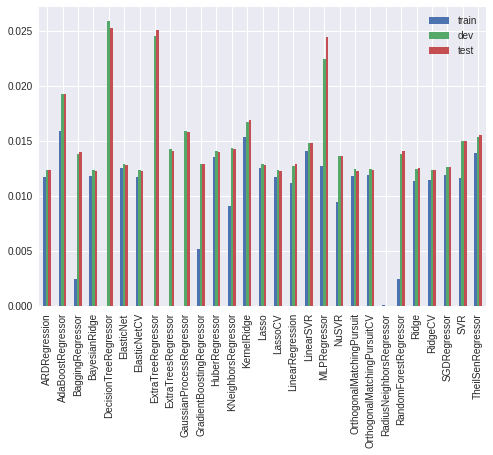

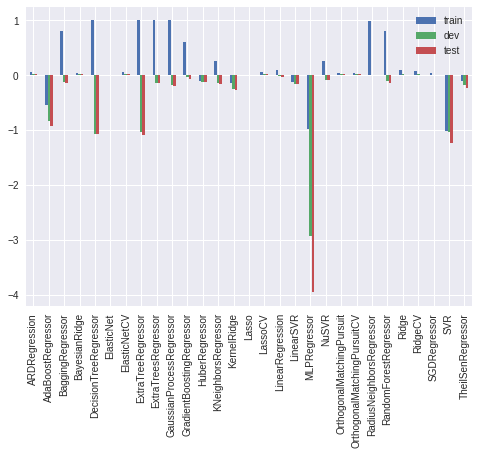

In [441]:

msedf = pd.DataFrame({ 'train': train_mse,
                      'dev':dev_mse,
                      'test':test_mse})

r2df = pd.DataFrame({ 'train': train_r2,
                      'dev':dev_r2,
                      'test':test_r2})

msedf.plot(kind='bar')

r2df.plot(kind='bar')



In [448]:
tmsedf = msedf.transpose()
tr2df = r2df.transpose()

In [453]:
selected_regs=[ 'ARDRegression', 'AdaBoostRegressor', 'BaggingRegressor', 'BayesianRidge',
         'DecisionTreeRegressor', 'ExtraTreeRegressor', 
         'ExtraTreesRegressor', 'GaussianProcessRegressor', 'GradientBoostingRegressor',
         'HuberRegressor', 'KNeighborsRegressor',
         'LinearRegression', 'LinearSVR', 
         #'MLPRegressor',
         'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 
         'RandomForestRegressor', 
         'SVR']

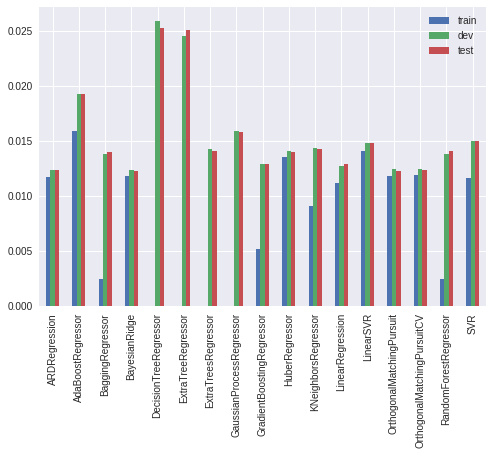

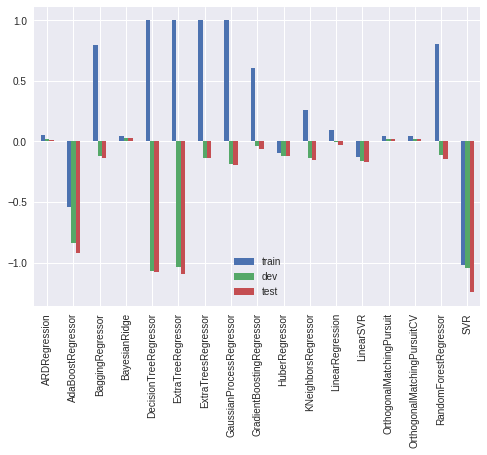

In [454]:
plt.figure(figsize=(20,10))
tmsedf[selected_regs].transpose().plot(kind='bar')

tr2df[selected_regs].transpose().plot(kind='bar')


### Save the outputs

In [424]:
msedf.to_csv('mse.csv')
r2df.to_csv('r2.csv')

In [434]:
from copy import deepcopy
import json
regresionoutput = dict()
regresionoutput['trainMSEall'] = deepcopy(train_mse)
regresionoutput['devMSEall'] = deepcopy(dev_mse)
regresionoutput['devMSEall'] = deepcopy(test_mse)
regresionoutput['trainR2all'] = deepcopy(train_r2)
regresionoutput['devR2all'] = deepcopy(dev_r2)
regresionoutput['testR2all'] = deepcopy(test_r2)

In [437]:
fout = open("regression_methods_comparison.txt","w")
fout.write(json.dumps(regresionoutput))
fout.close()

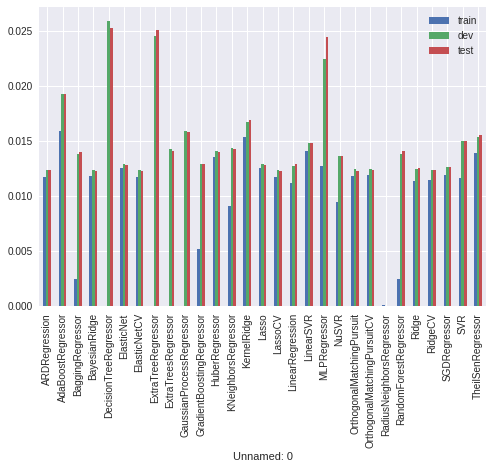

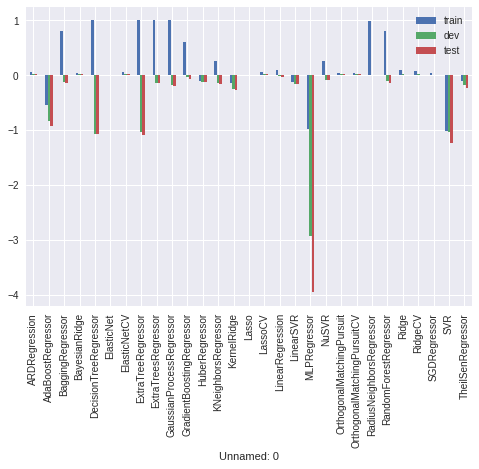

In [440]:
xx= pd.read_csv('mse.csv')
xx.set_index('Unnamed: 0',inplace=True)
xx.plot(kind='bar')
xx= pd.read_csv('r2.csv')
xx.set_index('Unnamed: 0',inplace=True)
xx.plot(kind='bar')

## SVR

In [176]:
def svrmodels():
    train_mse = dict()
    dev_mse = dict()

    train_r2 = dict()
    dev_r2 = dict()

    is_print= False

    param_grid = {
        'gamma': [0.0001, 0.001,0.01, 0.1, 1, 10, 100],
        'C': [0.001, 0.01, 0.1, 1, 10, 100,200]
    }

    #### iterate over regressors
    for gm in param_grid['gamma']:
        for c in param_grid['C']:
            name = 'gamma:'+str(gm)+'C:'+str(c)
            print(name)
            reg = MultiOutputRegressor(SVR(C=c, gamma=gm))
            reg.fit(X_train, y_train)

            train_mse[name], train_r2[name] = regscores(y_train, reg.predict(X_train),prnt=is_print)
            dev_mse[name], dev_r2[name] = regscores(y_dev, reg.predict(X_dev),prnt=is_print) 
            test_mse[name], test_r2[name] = regscores(y_test, reg.predict(X_test),prnt=is_print)

    msedf = pd.DataFrame({ 'train': train_mse,'dev':dev_mse})
    r2df = pd.DataFrame({ 'train': train_r2, 'dev':dev_r2})
        
    return msedf,r2df

gamma:0.0001C:0.001
gamma:0.0001C:0.01
gamma:0.0001C:0.1
gamma:0.0001C:1
gamma:0.0001C:10
gamma:0.0001C:100
gamma:0.0001C:200
gamma:0.001C:0.001
gamma:0.001C:0.01
gamma:0.001C:0.1
gamma:0.001C:1
gamma:0.001C:10
gamma:0.001C:100
gamma:0.001C:200
gamma:0.01C:0.001
gamma:0.01C:0.01
gamma:0.01C:0.1
gamma:0.01C:1
gamma:0.01C:10
gamma:0.01C:100
gamma:0.01C:200
gamma:0.1C:0.001
gamma:0.1C:0.01
gamma:0.1C:0.1
gamma:0.1C:1
gamma:0.1C:10
gamma:0.1C:100
gamma:0.1C:200
gamma:1C:0.001
gamma:1C:0.01
gamma:1C:0.1
gamma:1C:1
gamma:1C:10
gamma:1C:100
gamma:1C:200
gamma:10C:0.001
gamma:10C:0.01
gamma:10C:0.1
gamma:10C:1
gamma:10C:10
gamma:10C:100
gamma:10C:200
gamma:100C:0.001
gamma:100C:0.01
gamma:100C:0.1
gamma:100C:1
gamma:100C:10
gamma:100C:100
gamma:100C:200


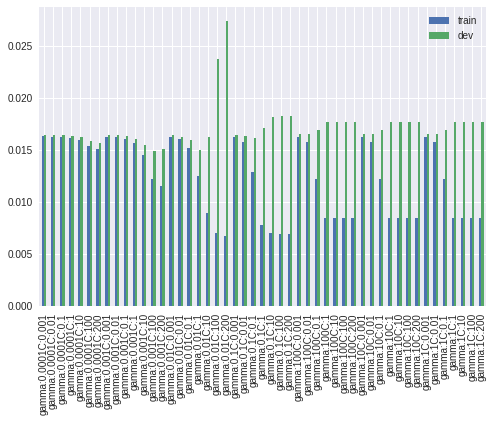

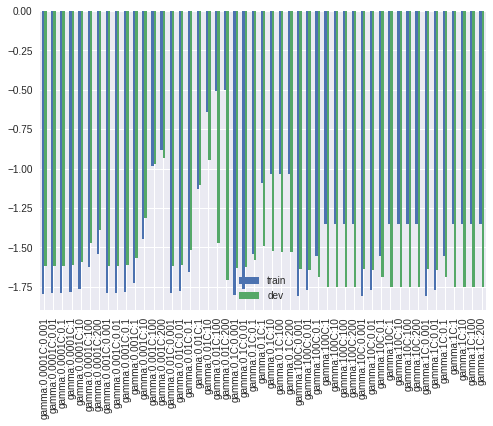

In [465]:
svrmsedf,svrr2df = svrmodels()
svrmsedf.plot(kind='bar')
svrr2df.plot(kind='bar')


## best SVR 

In [182]:
def svrmodel(c=1, gm=0.001):
    train_mse = dict()
    dev_mse = dict()
    test_mse = dict()
    train_r2 = dict()
    dev_r2 = dict()
    test_r2 = dict()
    
    name="SVR "
    reg = MultiOutputRegressor(SVR(C=c, gamma=gm))
    reg.fit(X_train, y_train)
    is_print=True
    train_mse[name], train_r2[name] = regscores(y_train, reg.predict(X_train),prnt=is_print)
    dev_mse[name], dev_r2[name] = regscores(y_dev, reg.predict(X_dev),prnt=is_print) 
    test_mse[name], test_r2[name] = regscores(y_test, reg.predict(X_test),prnt=is_print)

    msedf = pd.DataFrame({ 'train': train_mse,'dev':dev_mse, 'test':test_mse})
    r2df = pd.DataFrame({ 'train': train_r2, 'dev':dev_r2, 'test':test_r2})

    return reg, msedf, r2df 

Mean squared error mse: 0.01571
Variance score r2: -1.72450
pearsor r2: 0.33330
Mean squared error mse: 0.01610
Variance score r2: -1.56549
pearsor r2: 0.26933
Mean squared error mse: 0.01600
Variance score r2: -1.90677
pearsor r2: 0.26099
Mean squared error mse: 0.00846
Variance score r2: -1.35497
pearsor r2: 0.91767
Mean squared error mse: 0.01773
Variance score r2: -1.74874
pearsor r2: 0.31269
Mean squared error mse: 0.01767
Variance score r2: -2.11470
pearsor r2: 0.30558


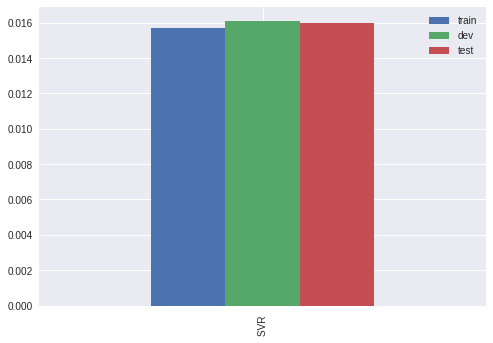

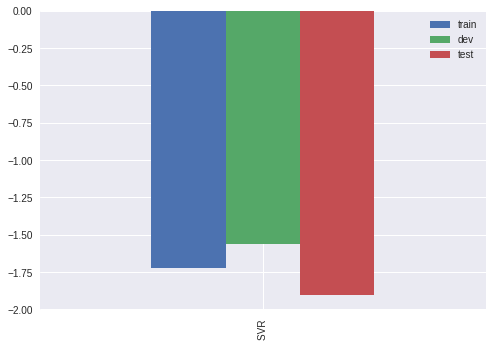

In [183]:
reg, svrmsedf,svrr2df = svrmodel(c=1, gm=0.001)
reg2, svrmsedf2,svrr2df2 = svrmodel(c=1, gm=1)

svrmsedf.plot(kind='bar')
svrr2df.plot(kind='bar')


In [377]:
print(svrmsedf2.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     train &       dev &     test \\
\midrule
SVR  &  0.008461 &  0.017731 &  0.01767 \\
\bottomrule
\end{tabular}



In [378]:
print(svrr2df2.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     train &       dev &      test \\
\midrule
SVR  & -1.354968 & -1.748745 & -2.114702 \\
\bottomrule
\end{tabular}



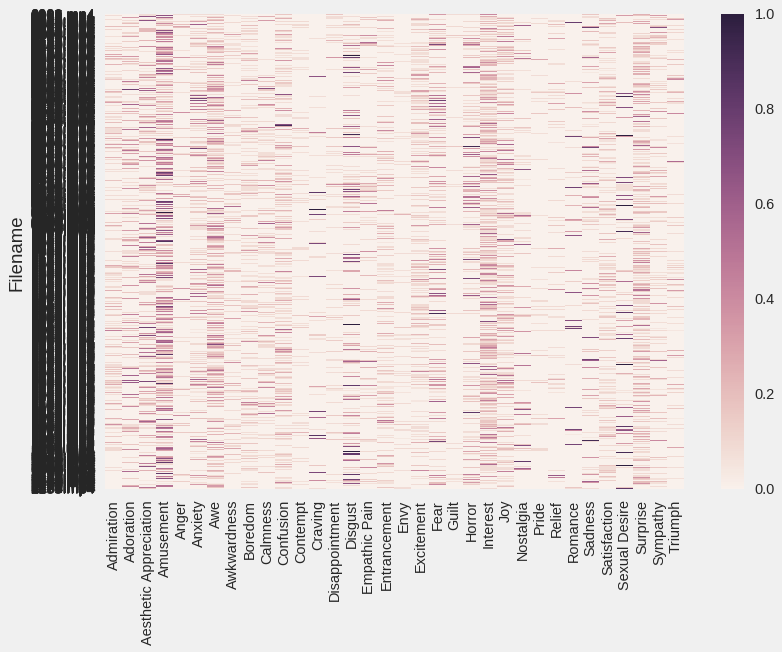

In [367]:
plt.style.use('fivethirtyeight')#switch to seaborn style
sns.heatmap(emodf)

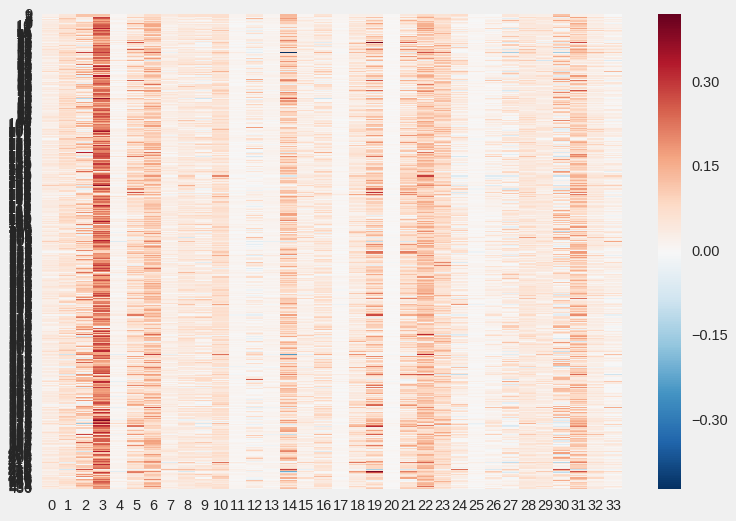

In [368]:
test_predict=reg.predict(X_test)
sns.heatmap(test_predict)

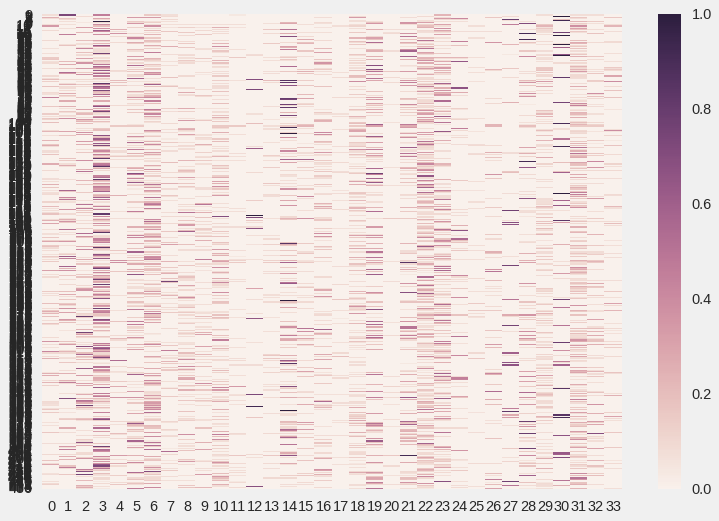

In [369]:
sns.heatmap(y_test)

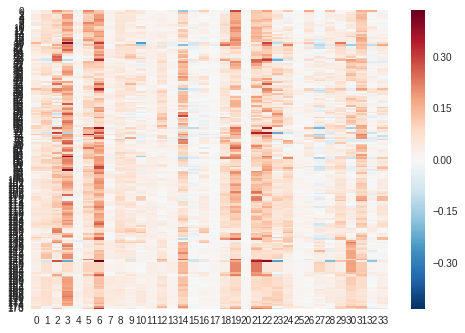

In [220]:
features = getLowLevelDesc('Sintel')
features = regstdscaler.transform(features)

features_predict=reg.predict(features)
sns.heatmap(features_predict)

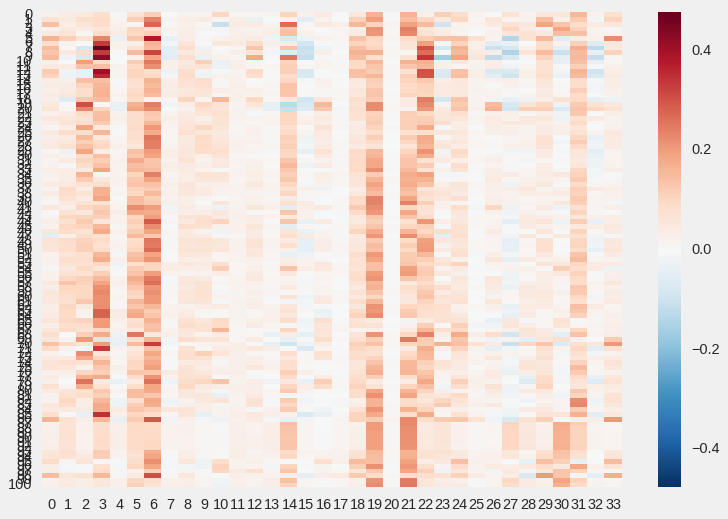

In [370]:
features = getLowLevelDesc('Chatter')
features = regstdscaler.transform(features)

features_predict=reg.predict(features)
sns.heatmap(features_predict)

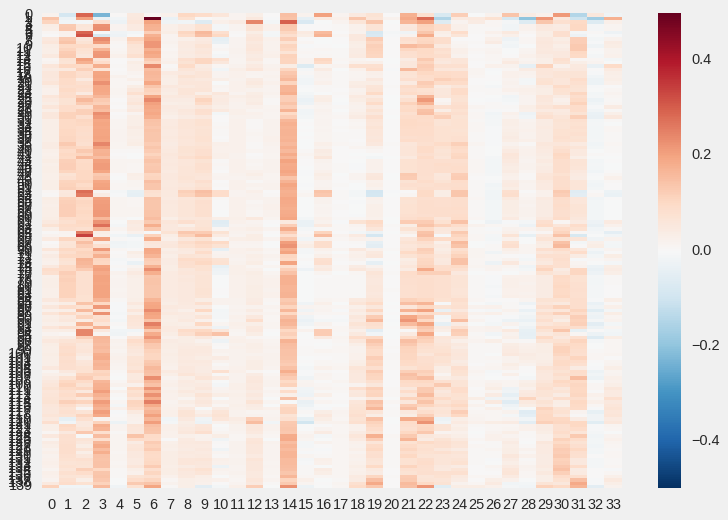

In [371]:
features = getLowLevelDesc('Cloudland')
features = regstdscaler.transform(features)

features_predict=reg.predict(features)
sns.heatmap(features_predict)

In [ ]:
def getFeaturesAnnotationsDf(movieNames):
    X = list()
    y = list()
    for mov in movieNames:
        features = getLowLevelDesc(mov)
        target = au.getAnnotationDf(mov)[['MeanValence','MeanArousal']]
        mlen = min(len(features),len(target))
        X.append(features[:mlen])
        y.append(target[:mlen])
    return np.array(X),np.array(y)

In [ ]:
llX,lly = getFeaturesAnnotationsDf(movieNames[:3])

## Multitask regressors

In [184]:
from sklearn.linear_model.coordinate_descent import MultiTaskElasticNet
from sklearn.linear_model.coordinate_descent import MultiTaskElasticNetCV
from sklearn.linear_model.coordinate_descent import MultiTaskLasso
from sklearn.linear_model.coordinate_descent import MultiTaskLassoCV

In [185]:
%%time
reg = MultiTaskLasso(alpha=0.1)
reg.fit(X_train, y_train)
y_predict = reg.predict(X_train)
reg.get_params()
print("Train score")
print(regscores(y_train, y_predict,prnt=True))
print("Dev score")
print(regscores(y_dev, reg.predict(X_dev),prnt=True) )
print("Test score")
print(regscores(y_test, reg.predict(X_test),prnt=True))


Train score
Mean squared error mse: 0.01255
Variance score r2: 0.00000
pearsor r2: 0.33300
(0.01255193436229719, 0.0)
Dev score
Mean squared error mse: 0.01285
Variance score r2: -0.00306
pearsor r2: 0.32610
(0.012847290682225681, -0.0030574500118481737)
Test score
Mean squared error mse: 0.01276
Variance score r2: -0.00250
pearsor r2: 0.31902
(0.012760518693940879, -0.002504155577809475)
CPU times: user 56 ms, sys: 40 ms, total: 96 ms
Wall time: 53.8 ms


In [186]:
%%time
reg = MultiTaskElasticNet()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_train)
reg.get_params()
print("Train score")
print(regscores(y_train, y_predict,prnt=True))
print("Dev score")
print(regscores(y_dev, reg.predict(X_dev),prnt=True) )
print("Test score")
print(regscores(y_test, reg.predict(X_test),prnt=True))


Train score
Mean squared error mse: 0.01255
Variance score r2: 0.00000
pearsor r2: 0.33300
(0.01255193436229719, 0.0)
Dev score
Mean squared error mse: 0.01285
Variance score r2: -0.00306
pearsor r2: 0.32610
(0.012847290682225681, -0.0030574500118481737)
Test score
Mean squared error mse: 0.01276
Variance score r2: -0.00250
pearsor r2: 0.31902
(0.012760518693940879, -0.002504155577809475)
CPU times: user 32 ms, sys: 24 ms, total: 56 ms
Wall time: 22.9 ms


## Gradient Boosting 

In [187]:
%%time
reg = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
reg.fit(X_train, y_train)

#reg.get_params()

print("Train score")
regscores(y_train, reg.predict(X_train),prnt=True)
print("Dev score")
regscores(y_dev, reg.predict(X_dev),prnt=True) 
print("Test score")
regscores(y_test, reg.predict(X_test),prnt=True)

Train score
Mean squared error mse: 0.00512
Variance score r2: 0.60987
pearsor r2: 0.83256
Dev score
Mean squared error mse: 0.01285
Variance score r2: -0.03538
pearsor r2: 0.35880
Test score
Mean squared error mse: 0.01293
Variance score r2: -0.05949
pearsor r2: 0.34299
CPU times: user 20.7 s, sys: 0 ns, total: 20.7 s
Wall time: 20.7 s


## Ridge regressor

In [188]:
%%time

reg = MultiOutputRegressor(linear_model.Ridge(alpha = .5))
reg.fit(X_train, y_train)
y_predict = reg.predict(X_train)
reg.get_params()

CPU times: user 176 ms, sys: 232 ms, total: 408 ms
Wall time: 134 ms


In [189]:
print("Train score")
print(regscores(y_train, y_predict,prnt=True))
print("Dev score")
print(regscores(y_dev, reg.predict(X_dev),prnt=True) )
print("Test score")
print(regscores(y_test, reg.predict(X_test),prnt=True))


Train score
Mean squared error mse: 0.01127
Variance score r2: 0.08901
pearsor r2: 0.44912
(0.011270720609560421, 0.08901428086181824)
Dev score
Mean squared error mse: 0.01246
Variance score r2: 0.01214
pearsor r2: 0.37171
(0.012460258532785701, 0.012143165010262753)
Test score
Mean squared error mse: 0.01257
Variance score r2: -0.00878
pearsor r2: 0.35396
(0.012566806561703678, -0.008781320575965626)


## Grid Search, MultiOutputRegressor doesn't work 

In [428]:
def getGridCV(pipe,paramgirid,Xtrain,ytrain,jobs=4): # scoring ? # jobs --> number of cores
    grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs=jobs)  
    grid.fit(Xtrain,ytrain)
    
    return grid

pipe = Pipeline([('classifier',MultiOutputRegressor(SVR()))])
param_grid = [
    {'classifier__gamma': [0.0001, 0.001,0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100,200]}]

grid = getGridCV(pipe,param_grid,X_train,y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("All grid scores")

## Display ouputs

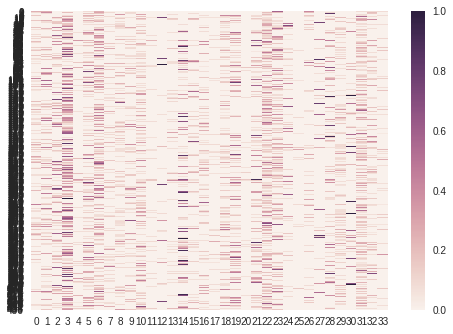

In [307]:
sns.heatmap(y_dev)

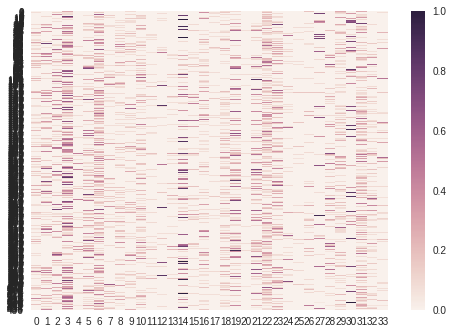

In [274]:
sns.heatmap(y_test)

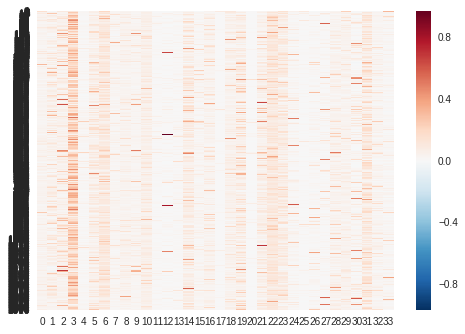

In [272]:
sns.heatmap(y_predict)

In [101]:
#sns.heatmap(labeldf[labeldf.columns[34:48]])

## old metrics code

Score  -0.029249544044848325
CPU times: user 88 ms, sys: 4 ms, total: 92 ms
Wall time: 90.7 ms


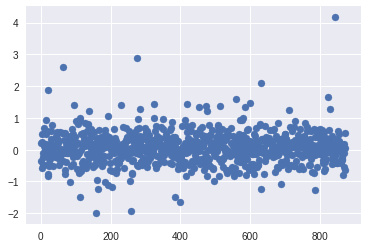

In [197]:
%%time

### TRAIN SCORE
#score = clf.score(X_train, y_train)
print('Score ',score)
y_predict = clf.predict(X_train)
err = np.sum(y_predict-y_train,axis=1,keepdims=True)
plt.scatter(range(len(err)),err)
### TEST SCORE
#score = clf.score(X_test, y_test)
print('Score ',score)
y_predict = clf.predict(X_test)
err = np.sum(y_predict-y_test,axis=1,keepdims=True)
plt.scatter(range(len(err)),err)

#serr = 1/m * sum(np.sum(y_predict-y_test,axis=1,keepdims=True))
#print(serr)

#y_predict.shape
#y_predict[:][10:15]
#clf.predict(X[:2])[::][30:35]
error=0
for i in range(len(y_train)):
    error+=(abs(y_train[i]-y_predict[i])/y_train[i])
train_error_gbst=error/len(y_train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Regression")


## video lenghts

In [31]:
total_len=0
ll=[]
for video in videodict:
    print(video,videodict[video].shape)
    ll.append(videodict[video].shape[0])
    total_len += videodict[video].shape[0]

0001 (47, 10)
0002 (64, 10)
0003 (120, 10)
0004 (25, 10)
0005 (151, 10)
0006 (77, 10)
0007 (137, 10)
0008 (35, 10)
0009 (36, 10)
0010 (14, 10)
0011 (30, 10)
0012 (41, 10)
0013 (36, 10)
0014 (151, 10)
0015 (197, 10)
0016 (27, 10)
0017 (125, 10)
0018 (78, 10)
0019 (30, 10)
0020 (367, 10)
0021 (86, 10)
0022 (438, 10)
0023 (16, 10)
0024 (377, 10)
0025 (46, 10)
0026 (10, 10)
0027 (332, 10)
0028 (17, 10)
0029 (449, 10)
0030 (32, 10)
0031 (59, 10)
0032 (451, 10)
0033 (84, 10)
0034 (250, 10)
0035 (24, 10)
0036 (11, 10)
0037 (24, 10)
0038 (150, 10)
0039 (79, 10)
0040 (374, 10)
0041 (150, 10)
0042 (96, 10)
0043 (139, 10)
0044 (20, 10)
0045 (55, 10)
0046 (112, 10)
0047 (119, 10)
0048 (49, 10)
0049 (16, 10)
0050 (40, 10)
0051 (183, 10)
0052 (58, 10)
0053 (1044, 10)
0054 (39, 10)
0055 (61, 10)
0056 (151, 10)
0057 (29, 10)
0058 (73, 10)
0059 (24, 10)
0060 (160, 10)
0061 (351, 10)
0062 (77, 10)
0063 (378, 10)
0064 (80, 10)
0065 (63, 10)
0066 (311, 10)
0067 (168, 10)
0068 (66, 10)
0069 (53, 10)
0070 (

1060 (37, 10)
1061 (257, 10)
1062 (31, 10)
1063 (59, 10)
1064 (266, 10)
1065 (96, 10)
1066 (450, 10)
1067 (46, 10)
1068 (378, 10)
1069 (8, 10)
1070 (25, 10)
1071 (51, 10)
1072 (362, 10)
1073 (45, 10)
1074 (15, 10)
1075 (32, 10)
1076 (378, 10)
1077 (512, 10)
1078 (26, 10)
1079 (63, 10)
1080 (170, 10)
1081 (90, 10)
1082 (79, 10)
1083 (31, 10)
1084 (147, 10)
1085 (159, 10)
1086 (38, 10)
1087 (16, 10)
1088 (94, 10)
1089 (79, 10)
1090 (99, 10)
1091 (252, 10)
1092 (18, 10)
1093 (34, 10)
1094 (10, 10)
1095 (359, 10)
1096 (29, 10)
1097 (378, 10)
1098 (138, 10)
1099 (92, 10)
1100 (92, 10)
1101 (75, 10)
1102 (34, 10)
1103 (182, 10)
1104 (50, 10)
1105 (40, 10)
1106 (124, 10)
1107 (176, 10)
1108 (24, 10)
1109 (76, 10)
1110 (34, 10)
1111 (17, 10)
1112 (232, 10)
1113 (298, 10)
1114 (476, 10)
1115 (47, 10)
1116 (13, 10)
1117 (10, 10)
1118 (15, 10)
1119 (48, 10)
1120 (60, 10)
1121 (378, 10)
1122 (32, 10)
1123 (23, 10)
1124 (377, 10)
1125 (17, 10)
1126 (56, 10)
1127 (16, 10)
1128 (272, 10)
1129 (19, 10

In [15]:
min(ll),max(ll)

(4, 2702)

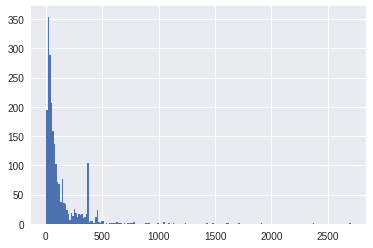

In [29]:
a= plt.hist(ll,bins=200,orientation='vertical')

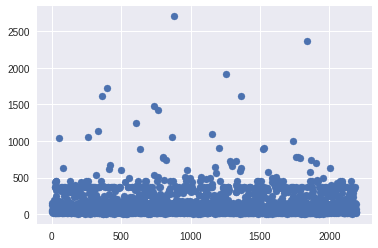

In [17]:
plt.scatter(range(len(ll)),ll)

In [30]:
total_len

274688

In [31]:
def lowlevelfeatures(movname,folder=featdir):
    fname = movname +'.mp4continous_features.txt'
    
    df = pd.DataFrame(np.genfromtxt( os.path.join(folder,fname)))
    df.columns = ['time','framemean','huemean','satmean','valmean', 'redmean','greenmean','bluemean', 'lummean','motion']
    return df


(<matplotlib.axes._subplots.AxesSubplot at 0x7ff0ed6c6048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0ed804630>)

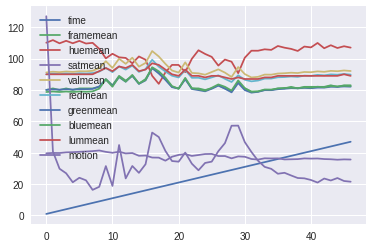

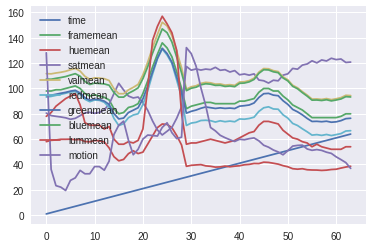

In [20]:
videodict['0001'].plot(), videodict['0002'].plot()

In [21]:
df = lowlevelfeatures('0001')

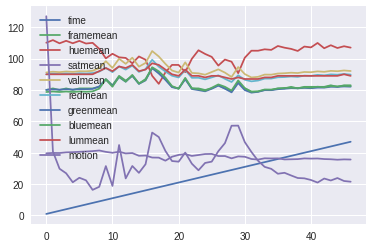

In [22]:
df.plot()

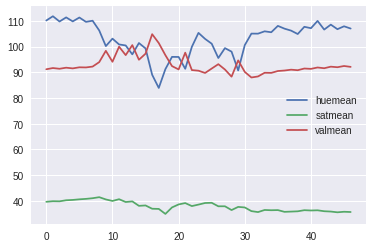

In [23]:
df[['huemean','satmean','valmean']].plot()

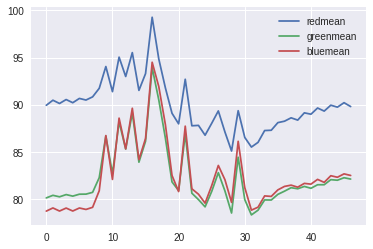

In [24]:
df[[ 'redmean','greenmean','bluemean']].plot()

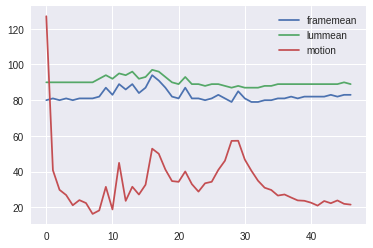

In [25]:
df[['framemean','lummean','motion']].plot()

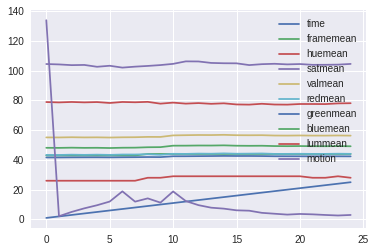

In [26]:
videodict['0004'].plot()

In [ ]:
#fnamelist[0].split('/')[-1].split('.')[0]

In [363]:
from sklearn.utils.testing import all_estimators
from sklearn import base

estimators = all_estimators()

'''
for name, class_ in estimators:
    if issubclass(class_, base.ClassifierMixin):
        print(name)

for name, class_ in estimators:
    if base.is_classifier(class_):
        print(name)
'''

print("Regressors\n")       
for name, reg_ in estimators:
    if base.is_regressor(reg_):
        print(name)

for name, reg_ in estimators:
    if base.is_regressor(reg_):
        print(reg_)

Regressors

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GaussianProcess
GaussianProcessRegressor
GradientBoostingRegressor
HuberRegressor
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
Ridge
RidgeCV
SGDRegressor
SVR
TheilSenRegressor
<class 'sklearn.linear_model.bayes.ARDRegression'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
<class 'sklearn.ensemble.bagging.BaggingRegressor'>
<class 'sklearn.linear_model.bayes.BayesianRidge'>
<class 'sklearn.cross_decomposition.cca_.CCA'>
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
<class 'sk

In [375]:
"".join([n+'(), ' for n in allregnames])

'ARDRegression(), AdaBoostRegressor(), BaggingRegressor(), BayesianRidge(), CCA(), DecisionTreeRegressor(), ElasticNet(), ElasticNetCV(), ExtraTreeRegressor(), ExtraTreesRegressor(), GaussianProcess(), GaussianProcessRegressor(), GradientBoostingRegressor(), HuberRegressor(), KNeighborsRegressor(), KernelRidge(), Lars(), LarsCV(), Lasso(), LassoCV(), LassoLars(), LassoLarsCV(), LassoLarsIC(), LinearRegression(), LinearSVR(), MLPRegressor(), MultiTaskElasticNet(), MultiTaskElasticNetCV(), MultiTaskLasso(), MultiTaskLassoCV(), NuSVR(), OrthogonalMatchingPursuit(), OrthogonalMatchingPursuitCV(), PLSCanonical(), PLSRegression(), PassiveAggressiveRegressor(), RANSACRegressor(), RadiusNeighborsRegressor(), RandomForestRegressor(), Ridge(), RidgeCV(), SGDRegressor(), SVR(), TheilSenRegressor(), '

In [ ]:
for n in allregnames:
    print(n+'(), ')